# Quantifying semisc similarity
## Chapter X: Data sequence analysis patches 

### Author: Anders Kampenes

### Dimension reduction and visualization with PCA

In [1]:
### Loading and preparing dataset

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt 
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.colors as colors

# Path hack.
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts.data_utils.plots import scatter, visualize_scatter_with_images,plot_similar_image,  plot_random_directions, plot_subset_of_directions 
from scripts.data_utils.generators import SimilarityImageGenerator, generate_directional_dataset, flatten_directional_data
from scripts.data_utils.grid_utils import pad_data_to_fit_patch,blockshaped, unblockshaped, plot_embeddings, plot_patched_directions, create_patched_data


#load  seimsic data
chapterName = "visualizing-seismic-using-a-variational-autoencoder"
output_folder = "/home/andykamp/master/quantify_seismic_similarity/notebooks/" + chapterName


/home/andykamp/envs/master/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/andykamp/envs/master/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/andykamp/envs/master/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/andykamp/envs/master/lib/python3.7/site-packages/tensorflow/pyth

In [3]:

#load  seimsic data
data_cube = np.load("/home/andykamp/master/quantify_seismic_similarity/data/processed/f3_entire_int8.npy")


print("img shape", data_cube.shape)

directions, inline_samples, xline_samples, tline_samples,data, labels, num_samples, shape = generate_directional_dataset(data_cube)
#print("labels", labels["inline"], labels["xline"], labels["tline"])

img shape (651, 951, 462)
651 951 462


28


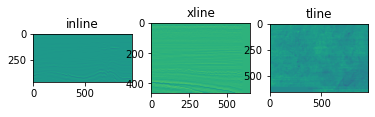

In [4]:


# plt different slices 
plot_random_directions(data, 100)

   

In [5]:
"""
We see that inline and xline directions have clear stacking patterns, 
but the tline is more meshy.

Intuitivly, we would could easily see more clear pattern change in iline/xline direction 
"""

'\nWe see that inline and xline directions have clear stacking patterns, \nbut the tline is more meshy.\n\nIntuitivly, we would could easily see more clear pattern change in iline/xline direction \n'

In [6]:
# but beforre we can do this we need to pad the images to go up in the wanted patch size
patch_size = 64

padding_needed {'inline': 53, 'xline': 9, 'tline': 50}
Found inline
Found xline
Found tline
padded_data (704, 960, 512)
padded_data (960, 704, 512)
padded_data (512, 960, 704)


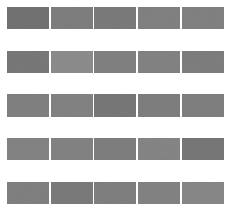

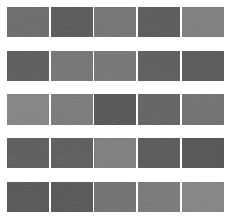

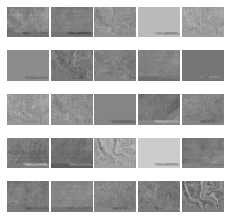

In [7]:
## We then pad each direction to be able to grid it to a 16, 32, 64 ++ grid. 
# The reason we choose such numbers are gupu optimilization (LINK)



padded_data = pad_data_to_fit_patch(data, patch_size, directions, num_samples, output_folder)
for dir in directions:
    print("padded_data", padded_data[dir].shape)
    
# plot supsets of each direction to visualize patterns in each direction
plot_subset_of_directions(padded_data, directions, 100)


In [8]:
# we have now padded all directions and can extract patched of patch_size 

patched_data, patched_labels, patched_labels_per_image, patched_labels_per_grid_cell, patched_labels_per_grid_cell, patched_grid_sizes, patched_num_smaples =  create_patched_data(padded_data, patch_size, directions)



dir shape (704, 960, 512)
nm 15 8 84480
patched_data (84480, 64, 64)
patched_labels[dir] [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [84470. 84471. 84472. 84473. 84474. 84475. 84476. 84477. 84478. 84479.]
patched_labels_per_image[dir] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [703. 703. 703. 703. 703. 703. 703. 703. 703. 703.]
patched_labels_per_grid_cell[dir] [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [110. 111. 112. 113. 114. 115. 116. 117. 118. 119.]
dir shape (960, 704, 512)
nm 11 8 84480
patched_data (84480, 64, 64)
patched_labels[dir] [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [84470. 84471. 84472. 84473. 84474. 84475. 84476. 84477. 84478. 84479.]
patched_labels_per_image[dir] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [959. 959. 959. 959. 959. 959. 959. 959. 959. 959.]
patched_labels_per_grid_cell[dir] [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [78. 79. 80. 81. 82. 83. 84. 85. 86. 87.]
dir shape (512, 960, 704)
nm 15 11 84480
patched_data (84480, 64, 64)
patched_labels[dir] [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [84470. 84471. 84472. 84473. 84474. 84

random_slice 60360
patched_slice (120, 64, 64)
random_slice 42064
patched_slice (88, 64, 64)
random_slice 58080
patched_slice (165, 64, 64)


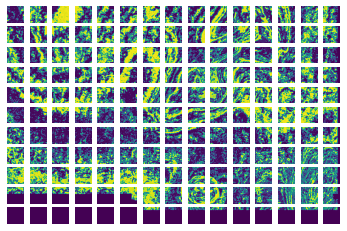

In [9]:
# plot random patches to verify

plot_patched_directions(padded_data, patched_data, patched_grid_sizes, patch_size, directions, output_folder)    
        

In [10]:
### Dimension reduction and visualization with PCA

In [11]:
from scipy.stats import norm

import keras
from keras import layers
from keras.models import Model
from keras import metrics
from keras import backend as K   # 'generic' backend so code works with either tensorflow or theano
from keras.optimizers import RMSprop, Adam, SGD

import numpy as np
import pandas as pd
K.clear_session()
np.random.seed(237)

Using TensorFlow backend.


In [12]:


direction = "inline"
print(patched_data[direction].shape)
data = np.expand_dims(patched_data[direction],axis=-1)
print(data.shape)
length = data.shape[0]//10
val_split = 0.1

# flatten data from (-1, patch_size, patch_size) to  (-1, 4064) 
data = data.reshape(patched_grid_sizes[direction][0], -1)
# find max abs value in data 
max_val = max(abs(np.min(data)),abs(np.max(data))) *0.7 # make sure to clipp sides 
print("abs max ",max_val) # --> outputs 127
# normalize between -1 and 1 
data = data/max_val 
# push first to get values between [0,2] and then devide by 2 to get values between [0,1)]
data = (data + 1) /2
data = np.clip(data, 0, 1)
print("MIN_MAX", np.min(data), np.max(data)) #--> outputs 0 and one 


# reshape to (-1, 64, 64)
data = data.reshape(-1, patch_size, patch_size)

(84480, 64, 64)
(84480, 64, 64, 1)
abs max  88.89999999999999
MIN_MAX 0.0 1.0


In [13]:
print(data.shape)

X_train = data[:1000]#data[:int(length*(1-val_split))]
X_valid = data[:100]#data[int(length*(1-val_split)):]
print(X_train.dtype, np.min(X_train), np.max(X_train))
# Normalize and reshape
X_train = X_train.astype('float32') #/ 255.
X_train = X_train.reshape(-1,patch_size,patch_size,1)

X_valid = X_valid.astype('float32') #/ 255.
X_valid = X_valid.reshape(-1,patch_size,patch_size,1)

print(X_train.shape, X_valid.shape )

(84480, 64, 64)
float64 0.0 1.0
(1000, 64, 64, 1) (100, 64, 64, 1)


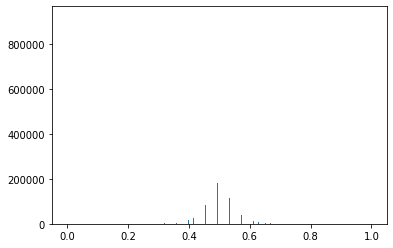

In [14]:
_ = plt.hist(X_train.flatten(), bins='auto')  # arguments are passed to np.histogram
plt.show()

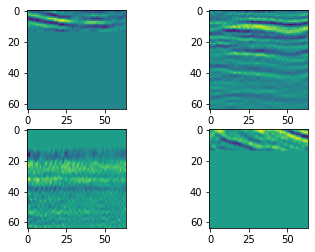

In [15]:
plt.figure(1)
plt.subplot(221)
plt.imshow(X_train[111][:,:,0])

plt.subplot(222)
plt.imshow(X_train[160][:,:,0])

plt.subplot(223)
plt.imshow(X_train[370][:,:,0])

plt.subplot(224)
plt.imshow(X_train[110][:,:,0])
plt.show()

In [16]:
### FIRST WE TRAIN THE ENTIRE NETWORK FOR MEAN, HOLDING VARIANCE CONTANT

In [60]:
img_shape = (patch_size, patch_size, 1)    # for MNIST
batch_size = 16
latent_dim = 2  # Number of latent dimension parameters
intermediate = 512 #1024
# Encoder architecture: Input -> Conv2D*4 -> Flatten -> Dense
input_img = keras.Input(shape=img_shape)

x = layers.Conv2D(32, 3,
                  padding='same', 
                  activation='tanh', strides=(2, 2))(input_img)
x = layers.Conv2D(32, 3,
                  padding='same', 
                  activation='tanh',
                  strides=(2, 2))(x)
#x = layers.Conv2D(64, 3,
#                  padding='same', 
#                  activation='tanh')(x)
#x = layers.Conv2D(64, 3,
#                  padding='same', 
#                  activation='tanh')(x)
# need to know the shape of the network here for the decoder
shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
x = layers.Dense(intermediate, activation='softplus')(x) # lienar works! relu works find but is not differentiable. softplus is nearly the sme but is smoot than differentiable

# Two outputs, latent mean and (log)variance
z_mu = layers.Dense(latent_dim)(x)
z_log_sigma = layers.Dense(latent_dim)(x)



In [61]:
### B. Sampling function

In [62]:
# sampling function 
def sampling(args):
    z_mu, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mu)[0], latent_dim),
                              mean=0., stddev=1.)
    return z_mu + K.exp(z_log_sigma) * epsilon

# sample vector from the latent distribution
z = layers.Lambda(sampling)([z_mu, z_log_sigma])

encoder = Model(input_img, [z_mu, z_log_sigma, z], name='encoder')
encoder.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_7 (InputLayer)             (None, 64, 64, 1)     0                                            
____________________________________________________________________________________________________
conv2d_3 (Conv2D)                (None, 32, 32, 32)    320         input_7[0][0]                    
____________________________________________________________________________________________________
conv2d_4 (Conv2D)                (None, 16, 16, 32)    9248        conv2d_3[0][0]                   
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 8192)          0           conv2d_4[0][0]                   
___________________________________________________________________________________________

In [63]:
### C. Decoder network

In [64]:
x = layers.Dense(intermediate, activation='tanh')#(z)#(decoder_input)


# Expand to 784 total pixels
xx1 = layers.Dense(np.prod(shape_before_flattening[1:]),
                 activation='tanh')#(x)#(decoder_input)

# reshape
xx2 = layers.Reshape(shape_before_flattening[1:])#(xx1)

# use Conv2DTranspose to reverse the conv layers from the encoder
xx3 = layers.Conv2DTranspose(32, 3,
                           padding='same', 
                           activation='tanh',
                           strides=(2, 2))#(xx2)
xx4 = layers.Conv2DTranspose(32, 3,
                           padding='same', 
                           activation='tanh',
                           strides=(2, 2))#(xx3)
xx5 = layers.Conv2DTranspose(3, 3,
                           padding='same', 
                           activation='tanh',
                           strides=(1, 1))#(xx4)
_x_decoded_mean = layers.Conv2D(1, 3,
                  name="mean",
                  padding='same', 
                  activation='linear')#(xx5)
_x_decoded_var = layers.Conv2D(1, 3,
                  name="var",
                  padding='same', 
                  activation='softplus')#(xx5) we want to restrict it to only positive numbers, so we use ReLU activation to squash it to our range.

# create decoder structure from z 
#__xx5 = xx5(xx4(xx3(xx2(xx1(x(z))))))
#z_decoded = _x_decoded_mean(__xx5) # used in vae model model       #x_decoded_mean#decoder(z)
#x_decoded_var = _x_decoded_var(__xx5) # used in loss  #x_decoded_mean#decoder(z)
#x_decoded_var.trainable = False




# define decoder as a model for later use 
# decoder takes the latent distribution sample as input
decoder_input = layers.Input(K.int_shape(z)[1:]) # input 
print(decoder_input, K.int_shape(z)[1:], z)

decoder_xx5 = xx5(xx4(xx3(xx2(xx1(x(decoder_input)))))) # shared layers between mean and variance
decoder_ouput_mean = _x_decoded_mean(decoder_xx5) # ouput mean
decoder_ouput_var = _x_decoded_var(decoder_xx5) # ouput var 


# create the actual 
decoder = Model(decoder_input, [decoder_ouput_mean, decoder_ouput_var], name='decoder')
decoder.get_layer("var").trainable = False
for l in decoder.layers:
    print(l.name, l.trainable)
decoder.summary()

# apply the decoder to the sample from the latent distribution to get both mean and var 
z_decoded_mean, z_decoded_var = decoder(encoder(input_img)[2])


Tensor("input_8:0", shape=(?, 2), dtype=float32) (2,) Tensor("lambda_2/add:0", shape=(?, 2), dtype=float32)
input_8 False
dense_9 True
dense_10 True
reshape_3 True
conv2d_transpose_5 True
conv2d_transpose_6 True
conv2d_transpose_7 True
mean True
var False
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_8 (InputLayer)             (None, 2)             0                                            
____________________________________________________________________________________________________
dense_9 (Dense)                  (None, 512)           1536        input_8[0][0]                    
____________________________________________________________________________________________________
dense_10 (Dense)                 (None, 8192)          4202496     dense_9[0][0]                    
_____________________________________

In [65]:
### D. Loss
#import math
#var_epsilon= 0.010
# construct a custom layer to calculate the loss
#class CustomVariationalLayer(keras.layers.Layer):    
    
#    def logx_loss(self, x, mean, var):
#        loss = (  0.5 * math.log(2 * math.pi)
#                + 0.5 * K.log(var+var_epsilon)  # NOW IT IS STATIC
#                + 0.5 * K.square(x - mean) / ( var+var_epsilon)) # NOW IT IS STATIC
#        loss = K.sum(loss, axis=-1)

#        return K.mean(loss)
    
#    def kl_loss(self,x, mean, var):
#        kl_loss = -5e-4 * K.mean(1 + z_log_sigma - K.square(z_mu) - K.exp(z_log_sigma), axis=-1) # want this to be less originally
#        return K.mean(kl_loss)
    
#    def vae_loss(self, x, mean, var):
#        #x = K.flatten(x)
#        #mean = K.flatten(mean)
#        #var = K.flatten(var)       
#        return self.logx_loss(x, mean, var) + self.kl_loss(x, mean, var)

#    # adds the custom loss to the class
#    def call(self, inputs):
#        x = inputs[0]
#        mean = inputs[1]
#        var = inputs[2]
#        loss = self.vae_loss(x, mean, var)
#        self.add_loss(loss, inputs=inputs)
#        return x

# apply the custom loss to the input images and the decoded latent distribution sample
#y = CustomVariationalLayer()([input_img, z_decoded_mean, z_decoded_var])

#vae_joint = Model(input_img, y)
#vae_joint.compile(optimizer='rmsprop', loss=None)
#vae_joint.summary()

# for loss diskussion see https://github.com/Lasagne/Recipes/issues/54
# loss nnot changing? https://datascience.stackexchange.com/questions/19578/why-my-training-and-validation-loss-is-not-changing
# validating normilization 
#print("MIN_MAX_X_train", np.min(X_train), np.max(X_train)) #--> must be [0,1] 
#print("MIN_MAX_X_valid", np.min(X_valid), np.max(X_valid)) #--> must be [0,1] 

# start training
#history = vae_joint.fit(x=X_train, y=None,
#        shuffle=True,
#        epochs=100,
#        batch_size=16,
#        validation_data=(X_valid, None))

#vae = Model(input_img, z_decoded_mean)


In [66]:
import math
var_epsilon = 0.010
# when using only var__epsilon (static variance) it seems as if the network is better at learning between training points
# this comes to show in the plots far below.
# this is becaus eneural net variance will make eveything more complex, and compressed, and give arbitrary variance inbetweeen 
# as descibed in "goemtric gmanifold paper"

def kl_loss(x, decoder_ouput_mean):
    kl_loss = -5e-4 * K.mean(1 + z_log_sigma - K.square(z_mu) - K.exp(z_log_sigma), axis=-1) # want this to be less originally
   
    return K.mean(kl_loss)

def logx_loss(x, decoder_ouput_mean):
    loss = (  0.5 * math.log(2 * math.pi)
            + 0.5 * K.log(var_epsilon)  # NOW IT IS STATIC use "z_decoded_var" if not static
            + 0.5 * K.square(x - decoder_ouput_mean) / ( var_epsilon)) # NOW IT IS STATIC use "z_decoded_var" if not static
    loss = K.sum(loss, axis=-1)
    #x = K.flatten(x)
    #x_decoded_mean = K.flatten(x_decoded_mean)
    #loss = metrics.binary_crossentropy(x, x_decoded_mean)
    return K.mean(loss)

def vae_loss(x, decoder_ouput_mean):
    return logx_loss(x, decoder_ouput_mean) + kl_loss(x, decoder_ouput_mean)
    #x = K.flatten(x)
    #z_decoded = K.flatten(z_decoded)
    # KL divergence
    #kl_loss = -5e-4 * K.mean(1 + z_log_sigma - K.square(z_mu) - K.exp(z_log_sigma), axis=-1) # want this to be less originally
    # Reconstruction loss
    #xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)# self.logx_loss(x, z_decoded)#

    #return K.mean(xent_loss + kl_loss)



In [67]:
vae = Model(input_img, z_decoded_mean)
vae.compile(optimizer="rmsprop", loss=vae_loss)
vae.summary()
#from keras.utils.vis_utils import plot_model
#plot_path = output_folder +"/model.png"
#print(plot_path)
#plot_model(
#    vae,
#    to_file=plot_path,
#    show_shapes=False,
#    show_layer_names=True,
#    rankdir="TB",
#)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 4206436   
_________________________________________________________________
decoder (Model)              [(None, 64, 64, 1), (None 4223451   
Total params: 8,429,887
Trainable params: 8,429,859
Non-trainable params: 28
_________________________________________________________________


In [25]:
# for loss diskussion see https://github.com/Lasagne/Recipes/issues/54
# loss nnot changing? https://datascience.stackexchange.com/questions/19578/why-my-training-and-validation-loss-is-not-changing
# validating normilization 
print("MIN_MAX_X_train", np.min(X_train), np.max(X_train)) #--> must be [0,1] 
print("MIN_MAX_X_valid", np.min(X_valid), np.max(X_valid)) #--> must be [0,1] 

# start training
history = vae.fit(x=X_train, y=X_train,
        shuffle=True,
        epochs=800,
        batch_size=16,
        validation_data=(X_valid, X_valid))




MIN_MAX_X_train 0.0 1.0
MIN_MAX_X_valid 0.0 1.0
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 1000 samples, validate on 100 samples
Epoch 1/800
1000/1000 [==============================] - 2s - loss: 0.5020 - val_loss: -0.8070
Epoch 2/800
1000/1000 [==============================] - 0s - loss: -0.9963 - val_loss: -1.1751
Epoch 3/800
1000/1000 [==============================] - 0s - loss: -1.1100 - val_loss: -1.1571
Epoch 4/800
1000/1000 [==============================] - 0s - loss: -1.1303 - val_loss: -1.1925
Epoch 5/800
1000/1000 [==============================] - 0s - loss: -1.1793 - val_loss: -1.1570
Epoch 6/800
1000/1000 [==============================] - 0s - loss: -1.1947 - val_loss: -1.2248
Epoch 7/800
1000/1000 [==============================] - 0s - loss: -1.2067 - val_loss: -1.2145
Epoch 8/800
1000/1000 [==============================] - 0s - loss: -1.2121 - val_loss: -1.1787
Epoch 9/800
1000/100

1000/1000 [==============================] - 0s - loss: -1.2837 - val_loss: -1.2732
Epoch 81/800
1000/1000 [==============================] - 0s - loss: -1.2844 - val_loss: -1.2721
Epoch 82/800
1000/1000 [==============================] - 0s - loss: -1.2844 - val_loss: -1.2746
Epoch 83/800
1000/1000 [==============================] - 0s - loss: -1.2847 - val_loss: -1.2720
Epoch 84/800
1000/1000 [==============================] - 0s - loss: -1.2851 - val_loss: -1.2748
Epoch 85/800
1000/1000 [==============================] - 0s - loss: -1.2854 - val_loss: -1.2744
Epoch 86/800
1000/1000 [==============================] - 0s - loss: -1.2857 - val_loss: -1.2735
Epoch 87/800
1000/1000 [==============================] - 0s - loss: -1.2860 - val_loss: -1.2735
Epoch 88/800
1000/1000 [==============================] - 0s - loss: -1.2864 - val_loss: -1.2765
Epoch 89/800
1000/1000 [==============================] - 0s - loss: -1.2864 - val_loss: -1.2751
Epoch 90/800
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: -1.3074 - val_loss: -1.2954
Epoch 164/800
1000/1000 [==============================] - 0s - loss: -1.3074 - val_loss: -1.2959
Epoch 165/800
1000/1000 [==============================] - 0s - loss: -1.3075 - val_loss: -1.2950
Epoch 166/800
1000/1000 [==============================] - 0s - loss: -1.3080 - val_loss: -1.2965
Epoch 167/800
1000/1000 [==============================] - 0s - loss: -1.3080 - val_loss: -1.2964
Epoch 168/800
1000/1000 [==============================] - 0s - loss: -1.3087 - val_loss: -1.2961
Epoch 169/800
1000/1000 [==============================] - 0s - loss: -1.3087 - val_loss: -1.2985
Epoch 170/800
1000/1000 [==============================] - 0s - loss: -1.3089 - val_loss: -1.2985
Epoch 171/800
1000/1000 [==============================] - 0s - loss: -1.3091 - val_loss: -1.2990
Epoch 172/800
1000/1000 [==============================] - 0s - loss: -1.3098 - val_loss: -1.2990
Epoch 173/800
1000/1000 [=========

1000/1000 [==============================] - 0s - loss: -1.3221 - val_loss: -1.3116
Epoch 247/800
1000/1000 [==============================] - 0s - loss: -1.3219 - val_loss: -1.3102
Epoch 248/800
1000/1000 [==============================] - 0s - loss: -1.3219 - val_loss: -1.3118
Epoch 249/800
1000/1000 [==============================] - 0s - loss: -1.3223 - val_loss: -1.3118
Epoch 250/800
1000/1000 [==============================] - 0s - loss: -1.3222 - val_loss: -1.3121
Epoch 251/800
1000/1000 [==============================] - 0s - loss: -1.3223 - val_loss: -1.3110
Epoch 252/800
1000/1000 [==============================] - 0s - loss: -1.3225 - val_loss: -1.3123
Epoch 253/800
1000/1000 [==============================] - 0s - loss: -1.3223 - val_loss: -1.3113
Epoch 254/800
1000/1000 [==============================] - 0s - loss: -1.3230 - val_loss: -1.3120
Epoch 255/800
1000/1000 [==============================] - 0s - loss: -1.3228 - val_loss: -1.3122
Epoch 256/800
1000/1000 [=========

1000/1000 [==============================] - 0s - loss: -1.3288 - val_loss: -1.3175
Epoch 330/800
1000/1000 [==============================] - 0s - loss: -1.3286 - val_loss: -1.3171
Epoch 331/800
1000/1000 [==============================] - 0s - loss: -1.3283 - val_loss: -1.3193
Epoch 332/800
1000/1000 [==============================] - 0s - loss: -1.3291 - val_loss: -1.3194
Epoch 333/800
1000/1000 [==============================] - 0s - loss: -1.3289 - val_loss: -1.3182
Epoch 334/800
1000/1000 [==============================] - 0s - loss: -1.3282 - val_loss: -1.3171
Epoch 335/800
1000/1000 [==============================] - 0s - loss: -1.3294 - val_loss: -1.3197
Epoch 336/800
1000/1000 [==============================] - 0s - loss: -1.3288 - val_loss: -1.3180
Epoch 337/800
1000/1000 [==============================] - 0s - loss: -1.3294 - val_loss: -1.3170
Epoch 338/800
1000/1000 [==============================] - 0s - loss: -1.3285 - val_loss: -1.3152
Epoch 339/800
1000/1000 [=========

1000/1000 [==============================] - 0s - loss: -1.3329 - val_loss: -1.3221
Epoch 413/800
1000/1000 [==============================] - 0s - loss: -1.3331 - val_loss: -1.3227
Epoch 414/800
1000/1000 [==============================] - 0s - loss: -1.3329 - val_loss: -1.3234
Epoch 415/800
1000/1000 [==============================] - 0s - loss: -1.3207 - val_loss: -1.3214
Epoch 416/800
1000/1000 [==============================] - 0s - loss: -1.3330 - val_loss: -1.3198
Epoch 417/800
1000/1000 [==============================] - 0s - loss: -1.3330 - val_loss: -1.3222
Epoch 418/800
1000/1000 [==============================] - 0s - loss: -1.3325 - val_loss: -1.3235
Epoch 419/800
1000/1000 [==============================] - 0s - loss: -1.3331 - val_loss: -1.3216
Epoch 420/800
1000/1000 [==============================] - 0s - loss: -1.3331 - val_loss: -1.3222
Epoch 421/800
1000/1000 [==============================] - 0s - loss: -1.3334 - val_loss: -1.3222
Epoch 422/800
1000/1000 [=========

1000/1000 [==============================] - 0s - loss: -1.3357 - val_loss: -1.3236
Epoch 496/800
1000/1000 [==============================] - 0s - loss: -1.3353 - val_loss: -1.3234
Epoch 497/800
1000/1000 [==============================] - 0s - loss: -1.3355 - val_loss: -1.3244
Epoch 498/800
1000/1000 [==============================] - 0s - loss: -1.3345 - val_loss: -1.3249
Epoch 499/800
1000/1000 [==============================] - 0s - loss: -1.3355 - val_loss: -1.3242
Epoch 500/800
1000/1000 [==============================] - 0s - loss: -1.3358 - val_loss: -1.3253
Epoch 501/800
1000/1000 [==============================] - 0s - loss: -1.3353 - val_loss: -1.3249
Epoch 502/800
1000/1000 [==============================] - 0s - loss: -1.3353 - val_loss: -1.3257
Epoch 503/800
1000/1000 [==============================] - 0s - loss: -1.3358 - val_loss: -1.3248
Epoch 504/800
1000/1000 [==============================] - 0s - loss: -1.3353 - val_loss: -1.3233
Epoch 505/800
1000/1000 [=========

1000/1000 [==============================] - 0s - loss: -1.3353 - val_loss: -1.3232
Epoch 579/800
1000/1000 [==============================] - 0s - loss: -1.3366 - val_loss: -1.3262
Epoch 580/800
1000/1000 [==============================] - 0s - loss: -1.3374 - val_loss: -1.3241
Epoch 581/800
1000/1000 [==============================] - 0s - loss: -1.3359 - val_loss: -1.3234
Epoch 582/800
1000/1000 [==============================] - 0s - loss: -1.3366 - val_loss: -1.3254
Epoch 583/800
1000/1000 [==============================] - 0s - loss: -1.3368 - val_loss: -1.3268
Epoch 584/800
1000/1000 [==============================] - 0s - loss: -1.3362 - val_loss: -1.3260
Epoch 585/800
1000/1000 [==============================] - 0s - loss: -1.3368 - val_loss: -1.3195
Epoch 586/800
1000/1000 [==============================] - 0s - loss: -1.3364 - val_loss: -1.3203
Epoch 587/800
1000/1000 [==============================] - 0s - loss: -1.3365 - val_loss: -1.3264
Epoch 588/800
1000/1000 [=========

1000/1000 [==============================] - 0s - loss: -1.3371 - val_loss: -1.3193
Epoch 662/800
1000/1000 [==============================] - 0s - loss: -1.3347 - val_loss: -1.3275
Epoch 663/800
1000/1000 [==============================] - 0s - loss: -1.3375 - val_loss: -1.3211
Epoch 664/800
1000/1000 [==============================] - 0s - loss: -1.3372 - val_loss: -1.3280
Epoch 665/800
1000/1000 [==============================] - 0s - loss: -1.3375 - val_loss: -1.3252
Epoch 666/800
1000/1000 [==============================] - 0s - loss: -1.3353 - val_loss: -1.3270
Epoch 667/800
1000/1000 [==============================] - 0s - loss: -1.3371 - val_loss: -1.3198
Epoch 668/800
1000/1000 [==============================] - 0s - loss: -1.3369 - val_loss: -1.3248
Epoch 669/800
1000/1000 [==============================] - 0s - loss: -1.3374 - val_loss: -1.3273
Epoch 670/800
1000/1000 [==============================] - 0s - loss: -1.3363 - val_loss: -1.3258
Epoch 671/800
1000/1000 [=========

1000/1000 [==============================] - 0s - loss: -1.3348 - val_loss: -1.3213
Epoch 745/800
1000/1000 [==============================] - 0s - loss: -1.3370 - val_loss: -1.3205
Epoch 746/800
1000/1000 [==============================] - 0s - loss: -1.3366 - val_loss: -1.3252
Epoch 747/800
1000/1000 [==============================] - 0s - loss: -1.3370 - val_loss: -1.3245
Epoch 748/800
1000/1000 [==============================] - 0s - loss: -1.3345 - val_loss: -1.3270
Epoch 749/800
1000/1000 [==============================] - 0s - loss: -1.3373 - val_loss: -1.2974
Epoch 750/800
1000/1000 [==============================] - 0s - loss: -1.3347 - val_loss: -1.3227
Epoch 751/800
1000/1000 [==============================] - 0s - loss: -1.3368 - val_loss: -1.3201
Epoch 752/800
1000/1000 [==============================] - 0s - loss: -1.3366 - val_loss: -1.3256
Epoch 753/800
1000/1000 [==============================] - 0s - loss: -1.3356 - val_loss: -1.3064
Epoch 754/800
1000/1000 [=========

In [68]:
# store model 
# serialize weights to HDF5
weight_path = output_folder+"/weight_64x64_2_1000_softplus_varstatic.h5"
model_path = output_folder+"/model_64x64_2_1000_softplus_varstatic.h5"
#vae.save_weights(weight_path)
#vae.save(model_path)
#print("Saved model to disk")

vae.load_weights(weight_path)
#vae = keras.models.load_model(model_path, custom_objects={'vae_loss': vae_loss}, compile=False)
print("LOADED")
#print(history.history.keys())
#print(history.history["loss"])



LOADED


In [28]:
vae_path = output_folder+"/model_64_64_8x8_1_000_tanh_variance_500epochs.h5"
vae.save(vae_path)

generator_path = output_folder+"/decoder_64_64_8x8_1_000_tanh_variance_500epochs.h5"
decoder.save(generator_path)

In [26]:
# X's and Y's
print("Making sure the data is normalzed", np.min(X_train), np.max(X_train))
X_valid_noTest = X_train[:100]
y_valid_noTest = patched_labels_per_image[direction][:100]
print(X_valid_noTest.shape)


Making sure the data is normalzed 0.0 1.0
(100, 64, 64, 1)


(41, 64, 64, 1)


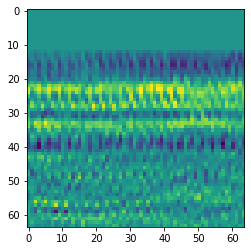

(41, 64, 64, 1)
(41, 64, 64, 1)


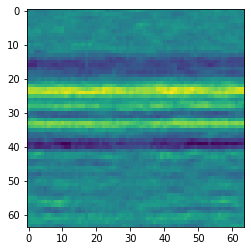

In [69]:
img_samples = X_train[235:276]
print(img_samples.shape)
plt.imshow(img_samples[11][:,:,0])
plt.show()
print(img_samples.shape)
img_decoded = vae.predict(img_samples)
print(img_decoded.shape)
plt.imshow(img_decoded[11][:,:,0])


img samples  0.0 0.8205849268841395
img samples  0.04336992 0.7789765
img samples  0.3420514 1.2631434
(5, 64, 64, 1) (5, 64, 64, 1)
(5, 64, 64, 1) (5, 64, 64, 1)


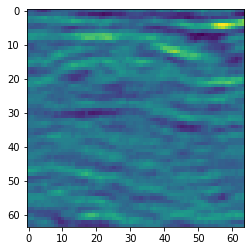

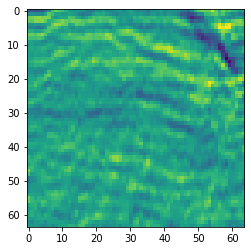

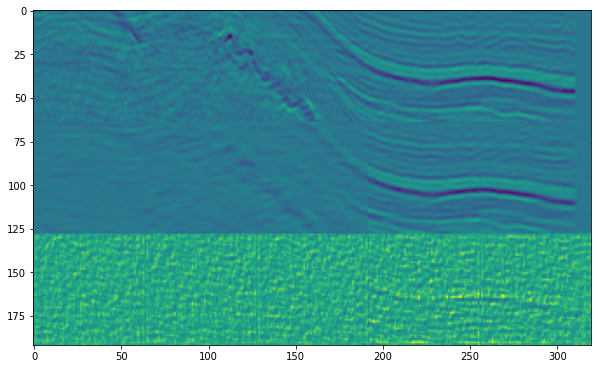

In [70]:
#encoder = Model(input_img, z_mu)
#encoder_var = Model(input_img, z_log_sigma)

#vaeeee = Model(input_img, z_decoded_mean)

num_imgs = 5
img_samples = data[700:700+num_imgs].reshape(-1, 64, 64, 1)
print("img samples ", np.min(img_samples), np.max(img_samples))
#run vae through some of them 
reconstructions_vae = vae.predict(img_samples)
_,reconstructions_enc_dec =decoder.predict(encoder.predict(img_samples)[0])
print("img samples ", np.min(reconstructions_vae), np.max(reconstructions_vae))
print("img samples ", np.min(reconstructions_enc_dec), np.max(reconstructions_enc_dec))

print(reconstructions_vae.shape, reconstructions_enc_dec.shape)
m, v= decoder.predict(encoder.predict(img_samples)[0])
print(m.shape, v.shape)
plt.imshow(m[0][:,:,0])
plt.show()
plt.imshow(img_samples[0][:,:,0])
plt.show()

rec_list = [img_samples, reconstructions_vae, reconstructions_enc_dec]
figure = np.zeros((patch_size * len(rec_list), patch_size * num_imgs))
for i, rec_type in enumerate(rec_list):
    for j in range(num_imgs):
        x_decoded = rec_type[j]
        img = rec_type[j][:,:,0]
        figure[i * patch_size: (i + 1) * patch_size,
               j * patch_size: (j + 1) * patch_size] = img

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()  
#plt.imshow(reconstructions[5].reshape(patch_size, patch_size))
#plt.show()


In [71]:
# Train the variance network  using DNN 
from keras import activations


# set all layers in the vae to non-trainable 
# need first to set all to trainabel bcause setting trainable on submodel overides lower overwrited
for l in vae.layers[1:]:
    l.trainable = True
    print(l.name, l.trainable)
    
# set encoder to non-trainable 
vae.get_layer("encoder").trainable = False
# set all decoder to non-trainable 
for l in vae.layers[2].layers:
    l.trainable = False
    print(l.name, l.trainable)

# set variance to be traibale 
vae.get_layer("decoder").get_layer("var").trainable = True
#vae.get_layer("decoder").get_layer("var").activation = activations.softplus
for l in vae.layers[2].layers:
    print(l.name, l.trainable)
vae.summary()


# sample vector from the latent distribution
decoder_mean = vae.get_layer("decoder")  
_mean = decoder_mean.layers[-2].output
_var = decoder_mean.layers[-1].output
print("(K.shape(z_mu)[0], 1)", (K.shape(z_mu)[0], 1))
def sampling(args):
    z_mu, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mu)),
                              mean=0., stddev=1.)
    return z_mu + K.exp(z_log_sigma) * epsilon

x_sampled = layers.Lambda(sampling)([_mean, _var])
# create sampled model
y_sampled = Model(inputs=decoder_mean.inputs, outputs=[_mean, _var, x_sampled], name='y_sampled')
y_sampled.summary()

_,_,sampled_ouput = y_sampled(encoder(input_img)[2])
vae = Model(inputs=input_img, outputs=sampled_ouput)

######### RE-STATE LOSS SO WE ONLY TRAIN VARIANCE ####################
import math
var_epsilon = 0.0010
learning_rate = 0.00001
# 𝜖 is a hyperparameter that needs to be small enough to be able to capture the variance 
# of your smallest dimension (bigger variances can be generated by the "ReLU" function).
# Along with this issue, you have to make sure that you're learning rate is small enough to 
# allow your loss function to converge because we're still dividing by potentially small values that can vary widely 

# when using only var__epsilon (static variance) it seems as if the network is better at learning between training points
# this comes to show in the plots far below.
# this is becaus eneural net variance will make eveything more complex, and compressed, and give arbitrary variance inbetweeen 
# as descibed in "goemtric gmanifold paper"

def kl_loss(x, decoder_ouput_mean):
    kl_loss = -5e-4 * K.mean(1 + z_log_sigma - K.square(z_mu) - K.exp(z_log_sigma), axis=-1) # want this to be less originally
   
    return K.mean(kl_loss)

def logx_loss(x, decoder_ouput_mean):
    loss = (  0.5 * math.log(2 * math.pi)
            + 0.5 * K.log(z_decoded_var + var_epsilon)  # NOW IT IS NOOOOT STATIC use "z_decoded_var" if not static
            + 0.5 * K.square(x - decoder_ouput_mean) / (z_decoded_var + var_epsilon)) # NOW IT IS NOOOOT STATIC use "z_decoded_var" if not static
    loss = K.sum(loss, axis=-1)
    return K.mean(loss)

def vae_loss_with_variance(x, decoder_ouput_mean):
    return logx_loss(x, decoder_ouput_mean) + kl_loss(x, decoder_ouput_mean)

# compile model to include loss 
optimizer = Adam(lr=learning_rate)
vae.compile(optimizer=optimizer, loss=vae_loss_with_variance)
vae.summary() 
# fit data to update the variance network weights
vae.fit(x=X_train, y=X_train,
        shuffle=True,
        epochs=1000,
        batch_size=16,
        validation_data=(X_valid, X_valid))


encoder True
decoder True
input_8 False
dense_9 False
dense_10 False
reshape_3 False
conv2d_transpose_5 False
conv2d_transpose_6 False
conv2d_transpose_7 False
mean False
var False
input_8 False
dense_9 False
dense_10 False
reshape_3 False
conv2d_transpose_5 False
conv2d_transpose_6 False
conv2d_transpose_7 False
mean False
var True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 4206436   
_________________________________________________________________
decoder (Model)              [(None, 64, 64, 1), (None 4223451   
Total params: 8,429,887
Trainable params: 28
Non-trainable params: 8,429,859
_________________________________________________________________
(K.shape(z_mu)[0], 1) (<tf.Tensor 'strided_slice_68:0' shape

1000/1000 [==============================] - 0s - loss: 3.7258 - val_loss: 3.7253
Epoch 40/1000
1000/1000 [==============================] - 0s - loss: 3.7247 - val_loss: 3.7314
Epoch 41/1000
1000/1000 [==============================] - 0s - loss: 3.7193 - val_loss: 3.7210
Epoch 42/1000
1000/1000 [==============================] - 0s - loss: 3.7193 - val_loss: 3.7161
Epoch 43/1000
1000/1000 [==============================] - 0s - loss: 3.7186 - val_loss: 3.7257
Epoch 44/1000
1000/1000 [==============================] - 0s - loss: 3.7183 - val_loss: 3.7105
Epoch 45/1000
1000/1000 [==============================] - 0s - loss: 3.7181 - val_loss: 3.7028
Epoch 46/1000
1000/1000 [==============================] - 0s - loss: 3.7117 - val_loss: 3.7105
Epoch 47/1000
1000/1000 [==============================] - 0s - loss: 3.7088 - val_loss: 3.7116
Epoch 48/1000
1000/1000 [==============================] - 0s - loss: 3.7046 - val_loss: 3.7101
Epoch 49/1000
1000/1000 [=============================

1000/1000 [==============================] - 0s - loss: 3.5588 - val_loss: 3.5643
Epoch 125/1000
1000/1000 [==============================] - 0s - loss: 3.5592 - val_loss: 3.5532
Epoch 126/1000
1000/1000 [==============================] - 0s - loss: 3.5568 - val_loss: 3.5591
Epoch 127/1000
1000/1000 [==============================] - 0s - loss: 3.5547 - val_loss: 3.5480
Epoch 128/1000
1000/1000 [==============================] - 0s - loss: 3.5590 - val_loss: 3.5465
Epoch 129/1000
1000/1000 [==============================] - 0s - loss: 3.5513 - val_loss: 3.5547
Epoch 130/1000
1000/1000 [==============================] - 0s - loss: 3.5509 - val_loss: 3.5521
Epoch 131/1000
1000/1000 [==============================] - 0s - loss: 3.5515 - val_loss: 3.5443
Epoch 132/1000
1000/1000 [==============================] - 0s - loss: 3.5449 - val_loss: 3.5489
Epoch 133/1000
1000/1000 [==============================] - 0s - loss: 3.5463 - val_loss: 3.5478
Epoch 134/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 3.4344 - val_loss: 3.4437
Epoch 209/1000
1000/1000 [==============================] - 0s - loss: 3.4346 - val_loss: 3.4380
Epoch 210/1000
1000/1000 [==============================] - 0s - loss: 3.4350 - val_loss: 3.4360
Epoch 211/1000
1000/1000 [==============================] - 0s - loss: 3.4349 - val_loss: 3.4351
Epoch 212/1000
1000/1000 [==============================] - 0s - loss: 3.4285 - val_loss: 3.4348
Epoch 213/1000
1000/1000 [==============================] - 0s - loss: 3.4294 - val_loss: 3.4316
Epoch 214/1000
1000/1000 [==============================] - 0s - loss: 3.4278 - val_loss: 3.4280
Epoch 215/1000
1000/1000 [==============================] - 0s - loss: 3.4277 - val_loss: 3.4328
Epoch 216/1000
1000/1000 [==============================] - 0s - loss: 3.4238 - val_loss: 3.4341
Epoch 217/1000
1000/1000 [==============================] - 0s - loss: 3.4232 - val_loss: 3.4152
Epoch 218/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 3.3446 - val_loss: 3.3489
Epoch 293/1000
1000/1000 [==============================] - 0s - loss: 3.3474 - val_loss: 3.3443
Epoch 294/1000
1000/1000 [==============================] - 0s - loss: 3.3442 - val_loss: 3.3470
Epoch 295/1000
1000/1000 [==============================] - 0s - loss: 3.3464 - val_loss: 3.3428
Epoch 296/1000
1000/1000 [==============================] - 0s - loss: 3.3415 - val_loss: 3.3433
Epoch 297/1000
1000/1000 [==============================] - 0s - loss: 3.3418 - val_loss: 3.3387
Epoch 298/1000
1000/1000 [==============================] - 0s - loss: 3.3430 - val_loss: 3.3434
Epoch 299/1000
1000/1000 [==============================] - 0s - loss: 3.3415 - val_loss: 3.3514
Epoch 300/1000
1000/1000 [==============================] - 0s - loss: 3.3421 - val_loss: 3.3425
Epoch 301/1000
1000/1000 [==============================] - 0s - loss: 3.3383 - val_loss: 3.3433
Epoch 302/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 3.2882 - val_loss: 3.3005
Epoch 377/1000
1000/1000 [==============================] - 0s - loss: 3.2894 - val_loss: 3.2897
Epoch 378/1000
1000/1000 [==============================] - 0s - loss: 3.2872 - val_loss: 3.2869
Epoch 379/1000
1000/1000 [==============================] - 0s - loss: 3.2866 - val_loss: 3.2856
Epoch 380/1000
1000/1000 [==============================] - 0s - loss: 3.2893 - val_loss: 3.2911
Epoch 381/1000
1000/1000 [==============================] - 0s - loss: 3.2851 - val_loss: 3.2866
Epoch 382/1000
1000/1000 [==============================] - 0s - loss: 3.2879 - val_loss: 3.2750
Epoch 383/1000
1000/1000 [==============================] - 0s - loss: 3.2886 - val_loss: 3.2899
Epoch 384/1000
1000/1000 [==============================] - 0s - loss: 3.2830 - val_loss: 3.2852
Epoch 385/1000
1000/1000 [==============================] - 0s - loss: 3.2849 - val_loss: 3.2863
Epoch 386/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 3.2591 - val_loss: 3.2640
Epoch 461/1000
1000/1000 [==============================] - 0s - loss: 3.2560 - val_loss: 3.2756
Epoch 462/1000
1000/1000 [==============================] - 0s - loss: 3.2605 - val_loss: 3.2693
Epoch 463/1000
1000/1000 [==============================] - 0s - loss: 3.2645 - val_loss: 3.2608
Epoch 464/1000
1000/1000 [==============================] - 0s - loss: 3.2601 - val_loss: 3.2675
Epoch 465/1000
1000/1000 [==============================] - 0s - loss: 3.2603 - val_loss: 3.2623
Epoch 466/1000
1000/1000 [==============================] - 0s - loss: 3.2580 - val_loss: 3.2652
Epoch 467/1000
1000/1000 [==============================] - 0s - loss: 3.2600 - val_loss: 3.2506
Epoch 468/1000
1000/1000 [==============================] - 0s - loss: 3.2604 - val_loss: 3.2574
Epoch 469/1000
1000/1000 [==============================] - 0s - loss: 3.2614 - val_loss: 3.2573
Epoch 470/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 3.2500 - val_loss: 3.2462
Epoch 545/1000
1000/1000 [==============================] - 0s - loss: 3.2529 - val_loss: 3.2446
Epoch 546/1000
1000/1000 [==============================] - 0s - loss: 3.2508 - val_loss: 3.2572
Epoch 547/1000
1000/1000 [==============================] - 0s - loss: 3.2509 - val_loss: 3.2467
Epoch 548/1000
1000/1000 [==============================] - 0s - loss: 3.2524 - val_loss: 3.2639
Epoch 549/1000
1000/1000 [==============================] - 0s - loss: 3.2529 - val_loss: 3.2496
Epoch 550/1000
1000/1000 [==============================] - 0s - loss: 3.2513 - val_loss: 3.2553
Epoch 551/1000
1000/1000 [==============================] - 0s - loss: 3.2544 - val_loss: 3.2421
Epoch 552/1000
1000/1000 [==============================] - 0s - loss: 3.2493 - val_loss: 3.2570
Epoch 553/1000
1000/1000 [==============================] - 0s - loss: 3.2537 - val_loss: 3.2443
Epoch 554/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 3.2489 - val_loss: 3.2542
Epoch 629/1000
1000/1000 [==============================] - 0s - loss: 3.2551 - val_loss: 3.2427
Epoch 630/1000
1000/1000 [==============================] - 0s - loss: 3.2512 - val_loss: 3.2434
Epoch 631/1000
1000/1000 [==============================] - 0s - loss: 3.2516 - val_loss: 3.2491
Epoch 632/1000
1000/1000 [==============================] - 0s - loss: 3.2558 - val_loss: 3.2551
Epoch 633/1000
1000/1000 [==============================] - 0s - loss: 3.2520 - val_loss: 3.2405
Epoch 634/1000
1000/1000 [==============================] - 0s - loss: 3.2500 - val_loss: 3.2534
Epoch 635/1000
1000/1000 [==============================] - 0s - loss: 3.2508 - val_loss: 3.2542
Epoch 636/1000
1000/1000 [==============================] - 0s - loss: 3.2527 - val_loss: 3.2603
Epoch 637/1000
1000/1000 [==============================] - 0s - loss: 3.2515 - val_loss: 3.2542
Epoch 638/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 3.2502 - val_loss: 3.2547
Epoch 713/1000
1000/1000 [==============================] - 0s - loss: 3.2469 - val_loss: 3.2545
Epoch 714/1000
1000/1000 [==============================] - 0s - loss: 3.2486 - val_loss: 3.2458
Epoch 715/1000
1000/1000 [==============================] - 0s - loss: 3.2515 - val_loss: 3.2534
Epoch 716/1000
1000/1000 [==============================] - 0s - loss: 3.2476 - val_loss: 3.2530
Epoch 717/1000
1000/1000 [==============================] - 0s - loss: 3.2487 - val_loss: 3.2540
Epoch 718/1000
1000/1000 [==============================] - 0s - loss: 3.2473 - val_loss: 3.2587
Epoch 719/1000
1000/1000 [==============================] - 0s - loss: 3.2478 - val_loss: 3.2613
Epoch 720/1000
1000/1000 [==============================] - 0s - loss: 3.2502 - val_loss: 3.2491
Epoch 721/1000
1000/1000 [==============================] - 0s - loss: 3.2521 - val_loss: 3.2457
Epoch 722/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 3.2493 - val_loss: 3.2366
Epoch 797/1000
1000/1000 [==============================] - 0s - loss: 3.2516 - val_loss: 3.2624
Epoch 798/1000
1000/1000 [==============================] - 0s - loss: 3.2515 - val_loss: 3.2547
Epoch 799/1000
1000/1000 [==============================] - 0s - loss: 3.2496 - val_loss: 3.2525
Epoch 800/1000
1000/1000 [==============================] - 0s - loss: 3.2489 - val_loss: 3.2524
Epoch 801/1000
1000/1000 [==============================] - 0s - loss: 3.2479 - val_loss: 3.2528
Epoch 802/1000
1000/1000 [==============================] - 0s - loss: 3.2503 - val_loss: 3.2504
Epoch 803/1000
1000/1000 [==============================] - 0s - loss: 3.2508 - val_loss: 3.2421
Epoch 804/1000
1000/1000 [==============================] - 0s - loss: 3.2473 - val_loss: 3.2472
Epoch 805/1000
1000/1000 [==============================] - 0s - loss: 3.2486 - val_loss: 3.2417
Epoch 806/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 3.2491 - val_loss: 3.2471
Epoch 881/1000
1000/1000 [==============================] - 0s - loss: 3.2486 - val_loss: 3.2529
Epoch 882/1000
1000/1000 [==============================] - 0s - loss: 3.2470 - val_loss: 3.2488
Epoch 883/1000
1000/1000 [==============================] - 0s - loss: 3.2497 - val_loss: 3.2527
Epoch 884/1000
1000/1000 [==============================] - 0s - loss: 3.2508 - val_loss: 3.2487
Epoch 885/1000
1000/1000 [==============================] - 0s - loss: 3.2531 - val_loss: 3.2381
Epoch 886/1000
1000/1000 [==============================] - 0s - loss: 3.2507 - val_loss: 3.2521
Epoch 887/1000
1000/1000 [==============================] - 0s - loss: 3.2480 - val_loss: 3.2450
Epoch 888/1000
1000/1000 [==============================] - 0s - loss: 3.2453 - val_loss: 3.2618
Epoch 889/1000
1000/1000 [==============================] - 0s - loss: 3.2468 - val_loss: 3.2454
Epoch 890/1000
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 3.2476 - val_loss: 3.2487
Epoch 965/1000
1000/1000 [==============================] - 0s - loss: 3.2463 - val_loss: 3.2463
Epoch 966/1000
1000/1000 [==============================] - 0s - loss: 3.2486 - val_loss: 3.2516
Epoch 967/1000
1000/1000 [==============================] - 0s - loss: 3.2498 - val_loss: 3.2461
Epoch 968/1000
1000/1000 [==============================] - 0s - loss: 3.2499 - val_loss: 3.2539
Epoch 969/1000
1000/1000 [==============================] - 0s - loss: 3.2510 - val_loss: 3.2581
Epoch 970/1000
1000/1000 [==============================] - 0s - loss: 3.2485 - val_loss: 3.2420
Epoch 971/1000
1000/1000 [==============================] - 0s - loss: 3.2468 - val_loss: 3.2428
Epoch 972/1000
1000/1000 [==============================] - 0s - loss: 3.2524 - val_loss: 3.2429
Epoch 973/1000
1000/1000 [==============================] - 0s - loss: 3.2515 - val_loss: 3.2407
Epoch 974/1000
1000/1000 [===================

In [72]:
# store model 
# serialize weights to HDF5
weight_path = output_folder+"/dnn_var_weight_64x64_2_1000_softplus_varstatic.h5"
model_path = output_folder+"/dnn_var__model_64x64_2_1000_softplus_varstatic.h5"
#vae.save_weights(weight_path)
#vae.save(model_path)
#print("Saved model to disk")

vae.load_weights(weight_path)
#vae = keras.models.load_model(model_path, custom_objects={'vae_loss': vae_loss}, compile=False)
print("LOADED")
#print(history.history.keys())
#print(history.history["loss"])


LOADED


img samples  0.0 0.8205849268841395
img samples  -5.414274 6.829411
img samples  0.35578203 0.5023439
(5, 64, 64, 1) (5, 64, 64, 1)
(5, 64, 64, 1) (5, 64, 64, 1)


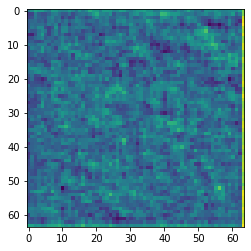

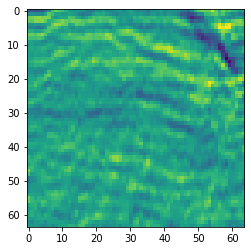

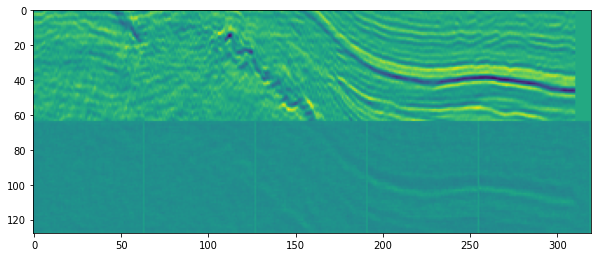

In [75]:

num_imgs = 5
img_samples = data[700:700+num_imgs].reshape(-1, 64, 64, 1)
print("img samples ", np.min(img_samples), np.max(img_samples))
#run vae through some of them 
reconstructions_vae = vae.predict(img_samples)
_,reconstructions_enc_dec =decoder.predict(encoder.predict(img_samples)[0])
print("img samples ", np.min(reconstructions_vae), np.max(reconstructions_vae))
print("img samples ", np.min(reconstructions_enc_dec), np.max(reconstructions_enc_dec))

print(reconstructions_vae.shape, reconstructions_enc_dec.shape)
m, v= decoder.predict(encoder.predict(img_samples)[0])
print(m.shape, v.shape)
plt.imshow(v[0][:,:,0])
plt.show()
plt.imshow(img_samples[0][:,:,0])
plt.show()

rec_list = [img_samples, reconstructions_enc_dec]
figure = np.zeros((patch_size * len(rec_list), patch_size * num_imgs))
for i, rec_type in enumerate(rec_list):
    for j in range(num_imgs):
        x_decoded = rec_type[j]
        img = rec_type[j][:,:,0]
        figure[i * patch_size: (i + 1) * patch_size,
               j * patch_size: (j + 1) * patch_size] = img

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()  

(1000, 2)
shapes 2 2
inside initiationrandom (64, 2)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
rbf (RBFLayer)               (None, 64)                192       
_________________________________________________________________
rb_dense (Dense)             (None, 1)                 65        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
(1000,)
Train on 1000 samples, validate on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 0s - loss: 0.5250 - val_loss: 0.5123
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 0.5042 - val_loss: 0.4960
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 0.4885 - val_loss: 0.4807
Epoch 4/10
1000/1000

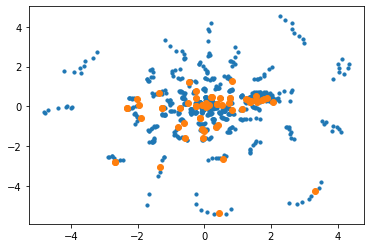

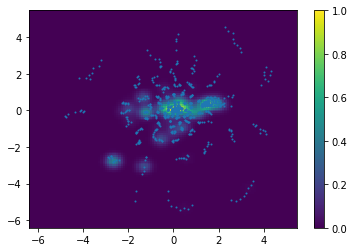

In [32]:
### RBF model
from keras.models import Sequential
from keras.layers.core import Dense
from keras.engine.topology import Layer
from keras.initializers import RandomUniform, Initializer, Constant
from keras.losses import binary_crossentropy
from keras.optimizers import RMSprop
from scripts.rbf.rbf import InitCentersKMeans, InitCentersRandom, RBFLayer
from tensorflow.keras.constraints import NonNeg

# provide the encoded data that the new rbf encoder needs to fit to 
# this data is the entire reason why we cannot build it and freeze it in the initial network 
X,_,_ = encoder.predict(X_train) # pca_model.transform(X_recon)
print(X.shape)

######### FIT PCA ####################
use_pca = False
if use_pca:
    from sklearn.decomposition import PCA
    X_reshape = X.reshape((X.shape[0], -1))
    print(X_reshape.shape)
    n_components = 2
    pca_model=PCA(n_components)
    pca = pca_model.fit_transform(X_reshape) 
    print(np.sum(pca_model.explained_variance_ratio_))

    plt.scatter(pca[:,0], pca[:, 1])
    project_first = False
    if project_first:
        X = pca
        
plt.scatter(X[:,0], X[:, 1], s=10)

#print(X.shape)
######### CREATE RBF NETWORK ####################
rbf_decoder_input = layers.Input((X.shape[-1],)) # input 

rbflayer = RBFLayer(64,
                    name="rbf",
                    initializer=InitCentersRandom(X),
                    betas=10, # determine the sharpness of the gausian https://towardsdatascience.com/most-effective-way-to-implement-radial-basis-function-neural-network-for-classification-problem-33c467803319
                    input_shape=(X.shape[-1],))

#rbfoutput = layers.Dense(1024, name="rb_dense", activation='linear',kernel_constraint=NonNeg(), bias_constraint=NonNeg())
rbfoutput = layers.Dense(1, name="rb_dense", activation='linear',kernel_constraint=NonNeg(), bias_constraint=NonNeg())

rbf_network = Model(inputs=rbf_decoder_input, outputs=rbfoutput(rbflayer(rbf_decoder_input)))
rbf_network.summary() 



######### PCA EMBEDDINGS TO 2 DIMS--> THEN TRAIN  ####################
learning_rate = 0.0001
optimizer = Adam(lr=learning_rate)
rbf_network.compile(optimizer=optimizer, loss='mean_squared_error')
print(np.zeros((X.shape[0],)).shape)
rbf_network.fit(x=X, y=np.ones((X.shape[0],)),
        shuffle=True,
        epochs=10,
        batch_size=16,
        validation_data=(X, np.ones((X.shape[0],))))



h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
end = max(x_max, y_max)
start =  min(x_min, y_min)
xx, yy = np.meshgrid(np.arange(start, end, h),
                    np.arange(start, end, h))

print(xx.shape, yy.shape)
grid_inp = np.c_[xx.ravel(), yy.ravel()]
if use_pca:
    if project_first:
        grid_latent = grid_inp
    else: grid_latent = pca_model.inverse_transform(grid_inp)
else: grid_latent = grid_inp
grid_latent_pred = rbf_network.predict(grid_latent)
print("PRED_SHAPE", grid_latent_pred.shape)
# project back 
grid_latent_pred = grid_latent_pred.reshape(xx.shape)
print(grid_latent_pred.shape)
print("MAXMIN", grid_latent_pred.min(), grid_latent_pred.max())
plt.figure()
#plt.imshow(grid_latent_pred)# norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),)
plt.pcolormesh(xx, yy, grid_latent_pred)# norm=colors.LogNorm(vmin=grid_latent_pred.min(), vmax=grid_latent_pred.max()),)
plt.scatter(X[:,0], X[:, 1], s=1)

plt.colorbar()
plt.show()


######### PCA EMBEDDINGS TO 2 DIMS--> THEN TRAIN  ####################



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 4206436   
_________________________________________________________________
decoder (Model)              [(None, 64, 64, 1), (None 4223451   
Total params: 8,429,887
Trainable params: 0
Non-trainable params: 8,429,887
_________________________________________________________________
input_2 False
dense_4 False
dense_5 False
reshape_1 False
conv2d_transpose_1 False
conv2d_transpose_2 False
conv2d_transpose_3 False
mean False
num clusters (64, 2)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_6 (InputLayer)         

1000/1000 [==============================] - 0s - loss: -0.8638 - val_loss: -0.8879
Epoch 48/800
1000/1000 [==============================] - 0s - loss: -0.8770 - val_loss: -0.9007
Epoch 49/800
1000/1000 [==============================] - 0s - loss: -0.8904 - val_loss: -0.9138
Epoch 50/800
1000/1000 [==============================] - 0s - loss: -0.9041 - val_loss: -0.9271
Epoch 51/800
1000/1000 [==============================] - 0s - loss: -0.9181 - val_loss: -0.9408
Epoch 52/800
1000/1000 [==============================] - 0s - loss: -0.9325 - val_loss: -0.9547
Epoch 53/800
1000/1000 [==============================] - 0s - loss: -0.9471 - val_loss: -0.9689
Epoch 54/800
1000/1000 [==============================] - 0s - loss: -0.9620 - val_loss: -0.9833
Epoch 55/800
1000/1000 [==============================] - 0s - loss: -0.9772 - val_loss: -0.9980
Epoch 56/800
1000/1000 [==============================] - 0s - loss: -0.9928 - val_loss: -1.0130
Epoch 57/800
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: -1.9083 - val_loss: -1.8135
Epoch 132/800
1000/1000 [==============================] - 0s - loss: -1.9113 - val_loss: -1.8187
Epoch 133/800
1000/1000 [==============================] - 0s - loss: -1.9140 - val_loss: -1.8177
Epoch 134/800
1000/1000 [==============================] - 0s - loss: -1.9164 - val_loss: -1.8190
Epoch 135/800
1000/1000 [==============================] - 0s - loss: -1.9192 - val_loss: -1.8227
Epoch 136/800
1000/1000 [==============================] - 0s - loss: -1.9223 - val_loss: -1.8266
Epoch 137/800
1000/1000 [==============================] - 0s - loss: -1.9244 - val_loss: -1.8199
Epoch 138/800
1000/1000 [==============================] - 0s - loss: -1.9266 - val_loss: -1.8318
Epoch 139/800
1000/1000 [==============================] - 0s - loss: -1.9296 - val_loss: -1.8287
Epoch 140/800
1000/1000 [==============================] - 0s - loss: -1.9322 - val_loss: -1.8329
Epoch 141/800
1000/1000 [=========

1000/1000 [==============================] - 0s - loss: -2.0488 - val_loss: -1.9318
Epoch 215/800
1000/1000 [==============================] - 0s - loss: -2.0502 - val_loss: -1.9342
Epoch 216/800
1000/1000 [==============================] - 0s - loss: -2.0506 - val_loss: -1.9325
Epoch 217/800
1000/1000 [==============================] - 0s - loss: -2.0516 - val_loss: -1.9418
Epoch 218/800
1000/1000 [==============================] - 0s - loss: -2.0524 - val_loss: -1.9430
Epoch 219/800
1000/1000 [==============================] - 0s - loss: -2.0534 - val_loss: -1.9354
Epoch 220/800
1000/1000 [==============================] - 0s - loss: -2.0550 - val_loss: -1.9439
Epoch 221/800
1000/1000 [==============================] - 0s - loss: -2.0555 - val_loss: -1.9417
Epoch 222/800
1000/1000 [==============================] - 0s - loss: -2.0565 - val_loss: -1.9437
Epoch 223/800
1000/1000 [==============================] - 0s - loss: -2.0569 - val_loss: -1.9387
Epoch 224/800
1000/1000 [=========

1000/1000 [==============================] - 0s - loss: -2.1136 - val_loss: -1.9934
Epoch 298/800
1000/1000 [==============================] - 0s - loss: -2.1140 - val_loss: -1.9905
Epoch 299/800
1000/1000 [==============================] - 0s - loss: -2.1146 - val_loss: -1.9906
Epoch 300/800
1000/1000 [==============================] - 0s - loss: -2.1149 - val_loss: -1.9903
Epoch 301/800
1000/1000 [==============================] - 0s - loss: -2.1159 - val_loss: -1.9943
Epoch 302/800
1000/1000 [==============================] - 0s - loss: -2.1164 - val_loss: -1.9928
Epoch 303/800
1000/1000 [==============================] - 0s - loss: -2.1171 - val_loss: -1.9938
Epoch 304/800
1000/1000 [==============================] - 0s - loss: -2.1176 - val_loss: -1.9952
Epoch 305/800
1000/1000 [==============================] - 0s - loss: -2.1178 - val_loss: -1.9943
Epoch 306/800
1000/1000 [==============================] - 0s - loss: -2.1188 - val_loss: -1.9927
Epoch 307/800
1000/1000 [=========

1000/1000 [==============================] - 0s - loss: -2.1350 - val_loss: -2.0105
Epoch 381/800
1000/1000 [==============================] - 0s - loss: -2.1348 - val_loss: -2.0074
Epoch 382/800
1000/1000 [==============================] - 0s - loss: -2.1350 - val_loss: -2.0115
Epoch 383/800
1000/1000 [==============================] - 0s - loss: -2.1355 - val_loss: -2.0098
Epoch 384/800
1000/1000 [==============================] - 0s - loss: -2.1355 - val_loss: -2.0107
Epoch 385/800
1000/1000 [==============================] - 0s - loss: -2.1355 - val_loss: -2.0091
Epoch 386/800
1000/1000 [==============================] - 0s - loss: -2.1354 - val_loss: -2.0136
Epoch 387/800
1000/1000 [==============================] - 0s - loss: -2.1357 - val_loss: -2.0113
Epoch 388/800
1000/1000 [==============================] - 0s - loss: -2.1356 - val_loss: -2.0103
Epoch 389/800
1000/1000 [==============================] - 0s - loss: -2.1358 - val_loss: -2.0098
Epoch 390/800
1000/1000 [=========

1000/1000 [==============================] - 0s - loss: -2.1395 - val_loss: -2.0163
Epoch 464/800
1000/1000 [==============================] - 0s - loss: -2.1397 - val_loss: -2.0133
Epoch 465/800
1000/1000 [==============================] - 0s - loss: -2.1394 - val_loss: -2.0155
Epoch 466/800
1000/1000 [==============================] - 0s - loss: -2.1396 - val_loss: -2.0140
Epoch 467/800
1000/1000 [==============================] - 0s - loss: -2.1394 - val_loss: -2.0144
Epoch 468/800
1000/1000 [==============================] - 0s - loss: -2.1391 - val_loss: -2.0142
Epoch 469/800
1000/1000 [==============================] - 0s - loss: -2.1397 - val_loss: -2.0137
Epoch 470/800
1000/1000 [==============================] - 0s - loss: -2.1397 - val_loss: -2.0113
Epoch 471/800
1000/1000 [==============================] - 0s - loss: -2.1397 - val_loss: -2.0154
Epoch 472/800
1000/1000 [==============================] - 0s - loss: -2.1401 - val_loss: -2.0177
Epoch 473/800
1000/1000 [=========

1000/1000 [==============================] - 0s - loss: -2.1412 - val_loss: -2.0160
Epoch 547/800
1000/1000 [==============================] - 0s - loss: -2.1408 - val_loss: -2.0138
Epoch 548/800
1000/1000 [==============================] - 0s - loss: -2.1411 - val_loss: -2.0161
Epoch 549/800
1000/1000 [==============================] - 0s - loss: -2.1413 - val_loss: -2.0155
Epoch 550/800
1000/1000 [==============================] - 0s - loss: -2.1414 - val_loss: -2.0184
Epoch 551/800
1000/1000 [==============================] - 0s - loss: -2.1413 - val_loss: -2.0137
Epoch 552/800
1000/1000 [==============================] - 0s - loss: -2.1415 - val_loss: -2.0166
Epoch 553/800
1000/1000 [==============================] - 0s - loss: -2.1411 - val_loss: -2.0175
Epoch 554/800
1000/1000 [==============================] - 0s - loss: -2.1413 - val_loss: -2.0181
Epoch 555/800
1000/1000 [==============================] - 0s - loss: -2.1412 - val_loss: -2.0163
Epoch 556/800
1000/1000 [=========

1000/1000 [==============================] - 0s - loss: -2.1425 - val_loss: -2.0186
Epoch 630/800
1000/1000 [==============================] - 0s - loss: -2.1422 - val_loss: -2.0189
Epoch 631/800
1000/1000 [==============================] - 0s - loss: -2.1421 - val_loss: -2.0181
Epoch 632/800
1000/1000 [==============================] - 0s - loss: -2.1425 - val_loss: -2.0194
Epoch 633/800
1000/1000 [==============================] - 0s - loss: -2.1421 - val_loss: -2.0189
Epoch 634/800
1000/1000 [==============================] - 0s - loss: -2.1423 - val_loss: -2.0185
Epoch 635/800
1000/1000 [==============================] - 0s - loss: -2.1425 - val_loss: -2.0184
Epoch 636/800
1000/1000 [==============================] - 0s - loss: -2.1424 - val_loss: -2.0187
Epoch 637/800
1000/1000 [==============================] - 0s - loss: -2.1424 - val_loss: -2.0194
Epoch 638/800
1000/1000 [==============================] - 0s - loss: -2.1424 - val_loss: -2.0185
Epoch 639/800
1000/1000 [=========

1000/1000 [==============================] - 0s - loss: -2.1426 - val_loss: -2.0179
Epoch 713/800
1000/1000 [==============================] - 0s - loss: -2.1434 - val_loss: -2.0217
Epoch 714/800
1000/1000 [==============================] - 0s - loss: -2.1428 - val_loss: -2.0175
Epoch 715/800
1000/1000 [==============================] - 0s - loss: -2.1430 - val_loss: -2.0148
Epoch 716/800
1000/1000 [==============================] - 0s - loss: -2.1431 - val_loss: -2.0197
Epoch 717/800
1000/1000 [==============================] - 0s - loss: -2.1433 - val_loss: -2.0179
Epoch 718/800
1000/1000 [==============================] - 0s - loss: -2.1435 - val_loss: -2.0201
Epoch 719/800
1000/1000 [==============================] - 0s - loss: -2.1432 - val_loss: -2.0212
Epoch 720/800
1000/1000 [==============================] - 0s - loss: -2.1436 - val_loss: -2.0208
Epoch 721/800
1000/1000 [==============================] - 0s - loss: -2.1431 - val_loss: -2.0167
Epoch 722/800
1000/1000 [=========

1000/1000 [==============================] - 0s - loss: -2.1443 - val_loss: -2.0197
Epoch 796/800
1000/1000 [==============================] - 0s - loss: -2.1441 - val_loss: -2.0173
Epoch 797/800
1000/1000 [==============================] - 0s - loss: -2.1441 - val_loss: -2.0227
Epoch 798/800
1000/1000 [==============================] - 0s - loss: -2.1437 - val_loss: -2.0188
Epoch 799/800
1000/1000 [==============================] - 0s - loss: -2.1442 - val_loss: -2.0183
Epoch 800/800
1000/1000 [==============================] - 0s - loss: -2.1443 - val_loss: -2.0184


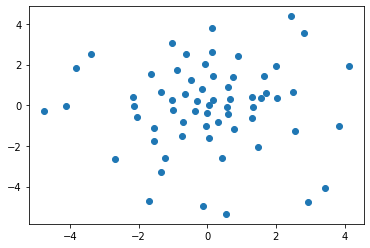

In [33]:



    

######### CREATE RBF VARIANCE NETWORK ####################
rbf_decoder_input = layers.Input(K.int_shape(z)[1:]) # input 

rbflayer = RBFLayer(64,
                    name="rbf",
                    initializer=InitCentersKMeans(X),#InitCentersRandom(X),
                    betas=1, # determine the sharpness of the gausian https://towardsdatascience.com/most-effective-way-to-implement-radial-basis-function-neural-network-for-classification-problem-33c467803319
                    input_shape=(latent_dim,))
#model.add(rbflayer)
#model.add(Dense(2, activation='sigmoid', name='foo'))
#model.add(Dense(1, activation='sigmoid', ))

#model.add(Dense(64, name='foo'))
# reshape
rbfoutput = layers.Dense(1024, name="rb_dense", activation='linear',kernel_constraint=NonNeg(), bias_constraint=NonNeg())#activation='tanh')#(z)#(decoder_input)
reshapelayer = layers.Reshape((32,32,1)) # subsampled image of 64*64  (i guess)
convT1 = layers.Conv2DTranspose(1, 3,
                           padding='same', #TODO NEED TO CLIP WEIGHT SO IT IS POSITIVE
                           activation='linear',
                           strides=(2, 2),
                           kernel_constraint=NonNeg(), bias_constraint=NonNeg())
#convT2 = layers.Conv2DTranspose(1, 3,
#                           padding='same', #TODO NEED TO CLIP WEIGHT SO IT IS POSITIVE
#                           activation='tanh',
#                           strides=(2, 2),
#                           kernel_constraint=NonNeg(), bias_constraint=NonNeg())
#convT3 = layers.Conv2DTranspose(1, 3,
#                           padding='same',  #TODO NEED TO CLIP WEIGHT SO IT IS POSITIVE
#                           activation='tanh',
#                           strides=(2, 2),
#                           kernel_constraint=NonNeg(), bias_constraint=NonNeg())
conv = layers.Conv2D(1, 3,
                     name="var",
                  padding='same', 
                  activation='linear', strides=(1, 1),
                  kernel_constraint=NonNeg(), bias_constraint=NonNeg())

#### 
#centers = rbflayer.get_weights()[0]
#widths = rbflayer.get_weights()[1]
#print("RBFWEIGHTS", centers.shape, widths.shape, widths[:10])
           
    
######### CREATE NEW RBF DECODER ####################

# create duplicate of old decoder but remove variance network

#print(decoder.inputs,rbf_decoder_input )
#decoder_mean_layers = [layer.output for layer in decoder.layers]
#for l in decoder_mean_layers:
#    l.trainable = False
#    print(l.name, l.trainable)    
#rbf_output_mean, _ = Model(inputs=rbf_decoder_input,outputs=decoder_mean_layers)


# set all layers in the vae to non-trainable 
# need first to set all to trainabel bcause setting trainable on submodel overides lower overwrited
for l in vae.layers[1:]:
    l.trainable = True
    
# set encoder to non-trainable 
vae.get_layer("encoder").trainable = False
# set all decoder to non-trainable 
for l in vae.layers[2].layers:
    l.trainable = False
# verify no layers are trainable
vae.summary()

# create non-trainable mean-network from existing
decoder_mean = vae.get_layer("decoder")
mean_network = Model(inputs=decoder_mean.inputs, outputs=decoder_mean.layers[-2].output,name='mean_network')## decoder(rbf_decoder_input)
for l in mean_network.layers:
    l.trainable = False
    print(l.name, l.trainable)
rbf_output_mean= mean_network(rbf_decoder_input)

# create new rb network 
rbf_network = rbfoutput(rbflayer(rbf_decoder_input))
rbf_output_var = conv(convT1(reshapelayer(rbf_network)))

# add both as a model 
rbf_decoder = Model(rbf_decoder_input, [rbf_output_mean, rbf_output_var],name='decoder')
rbf_decoder.summary()
print("RBF ENCODER")
for l in rbf_decoder.layers:
    l.trainable = True
    print(l.name, l.trainable)   
# set encoder to non-trainable 
rbf_decoder.get_layer("mean_network").trainable = False
rbf_decoded_mean, rbf_decoded_var = rbf_decoder(encoder(input_img)[2])


           
######### RE-STATE LOSS SO WE ONLY TRAIN RBF ####################
import math
var_epsilon = 0.00010
learning_rate = 0.00001
# when using only var__epsilon (static variance) it seems as if the network is better at learning between training points
# this comes to show in the plots far below.
# this is becaus eneural net variance will make eveything more complex, and compressed, and give arbitrary variance inbetweeen 
# as descibed in "goemtric gmanifold paper"

def kl_loss(x, rbf_decoded_mean):
    kl_loss = -5e-4 * K.mean(1 + z_log_sigma - K.square(z_mu) - K.exp(z_log_sigma), axis=-1) # want this to be less originally
   
    return K.mean(kl_loss)

def logx_loss(x, rbf_decoded_mean):
    loss = (  0.5 * math.log(2 * math.pi)
            + 0.5 * K.log(rbf_decoded_var +  var_epsilon) 
            + 0.5 * K.square(x - rbf_decoded_mean) / (rbf_decoded_var +  var_epsilon))
    loss = K.sum(loss, axis=-1)
    #x = K.flatten(x)
    #x_decoded_mean = K.flatten(x_decoded_mean)
    #loss = metrics.binary_crossentropy(x, x_decoded_mean)
    return K.mean(loss)

def rbf_vae_loss_with_variance(x, rbf_decoded_mean):
    return logx_loss(x, rbf_decoded_mean) + kl_loss(x, rbf_decoded_mean)
    #x = K.flatten(x)
    #z_decoded = K.flatten(z_decoded)
    # KL divergence
    #kl_loss = -5e-4 * K.mean(1 + z_log_sigma - K.square(z_mu) - K.exp(z_log_sigma), axis=-1) # want this to be less originally
    # Reconstruction loss
    #xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)# self.logx_loss(x, z_decoded)#

    #return K.mean(xent_loss + kl_loss)

######### CREATE NEW RBF VAE ####################

vae = Model(input_img, rbf_decoded_mean)
# load the weights if it has not been loaded already....
#filename =output_folder+"/model_64_64_8x8_1_000_tanh_variance_static.h5"
#rbf_vae.load_weights(filename)

# compile model to include loss 
optimizer = Adam(lr=learning_rate)
vae.compile(optimizer=optimizer, loss=rbf_vae_loss_with_variance)
vae.summary() 
# fit data to update the variance network weights
vae.fit(x=X_train, y=X_train,
        shuffle=True,
        epochs=800,
        batch_size=16,
        validation_data=(X_valid, X_valid))

In [57]:
# store model 
# serialize weights to HDF5
weight_path = output_folder+"/rbf_weight_64x64_2_1000_softplus_varstatic.h5"
model_path = output_folder+"/rbf_model_64x64_2_1000_softplus_varstatic.h5"
#vae.save_weights(weight_path)
#vae.save(model_path)
#print("Saved model to disk")

vae.load_weights(weight_path)
#vae = keras.models.load_model(model_path, custom_objects={'vae_loss': vae_loss}, compile=False)
print("LOADED")
#print(history.history.keys())
#print(history.history["loss"])



LOADED


rbf badwidths [1.1331161 1.1224563 1.144437  1.1000669 1.0804112 1.0327532 1.1343731
 1.2132518 1.0840002 1.1269239 1.1646647 1.0502739 1.0740921 1.1054163
 1.1171162 1.1771888 1.0338919 1.150263  1.1102135 1.1485909 1.0658369
 1.1979233 1.1505998 1.2354833 1.0991887 1.1909755 1.1524783 1.1681349
 1.1000364 1.1947504 1.1513299 1.1122754 1.0885512 1.0773621 1.0333722
 1.2260394 1.1359011 1.1122065 1.096804  1.0647911 1.0998287 1.0749016
 1.076248  1.1358619 1.0920551 1.1601032 1.0712897 1.0840864 1.0881861
 1.1653491 1.0642936 1.0973425 1.0950488 1.0970706 1.0775309 1.0778899
 1.1097406 1.15544   1.113492  1.1198319 1.1241574 1.1872903 1.0867754
 1.1645048]
img samples  0.0 0.8205849268841395
img samples  0.04336989 0.77897644
img samples  1.6259579e-06 0.0049554543
(5, 64, 64, 1) (5, 64, 64, 1)
(5, 64, 64, 1) (5, 64, 64, 1)


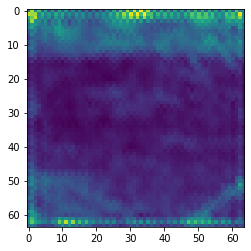

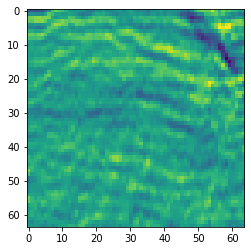

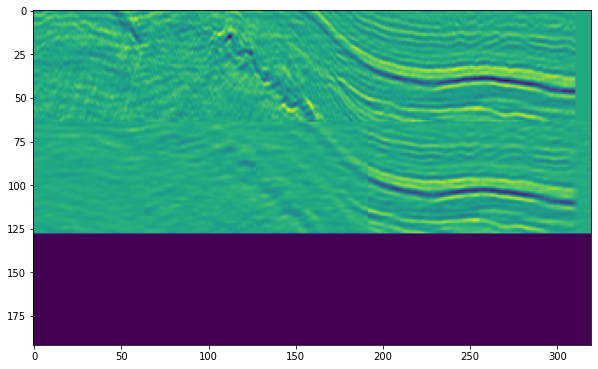

In [58]:
print("rbf badwidths", rbf_decoder.layers[1].get_weights()[1])

num_imgs = 5
img_samples = data[700:700+num_imgs].reshape(-1, 64, 64, 1)
print("img samples ", np.min(img_samples), np.max(img_samples))
#run vae through some of them 
reconstructions_vae = vae.predict(img_samples)
_,reconstructions_enc_dec =rbf_decoder.predict(encoder.predict(img_samples)[0])
print("img samples ", np.min(reconstructions_vae), np.max(reconstructions_vae))
print("img samples ", np.min(reconstructions_enc_dec), np.max(reconstructions_enc_dec))

print(reconstructions_vae.shape, reconstructions_enc_dec.shape)
m, v= rbf_decoder.predict(encoder.predict(img_samples)[0])
print(m.shape, v.shape)
plt.imshow(v[0][:,:,0])
plt.show()
plt.imshow(img_samples[0][:,:,0])
plt.show()

rec_list = [img_samples, reconstructions_vae, reconstructions_enc_dec]
figure = np.zeros((patch_size * len(rec_list), patch_size * num_imgs))
for i, rec_type in enumerate(rec_list):
    for j in range(num_imgs):
        x_decoded = rec_type[j]
        img = rec_type[j][:,:,0]
        figure[i * patch_size: (i + 1) * patch_size,
               j * patch_size: (j + 1) * patch_size] = img

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()  

In [31]:

centers = rbflayer.get_weights()[0]
widths = rbflayer.get_weights()[1]
print("RBFWEIGHTS", centers.shape, widths.shape, widths)
# create a rbf modelfor later NOT USED 
rbf_generator = Model(rbf_decoder_input, decoder_rbf_var)
rbf_generator.summary()
rbf_only_generator = Model(rbf_decoder_input, rbflayer(rbf_decoder_input))
rbf_only_generator.summary()
print("rbf badwidths", rbf_generator.layers[1].get_weights()[1])

num_imgs = 5
img_samples = data[700:700+num_imgs].reshape(-1, 64, 64, 1)
print("img samples ", np.min(img_samples), np.max(img_samples))
#run vae through some of them 
reconstructions_vae = rbf_vae.predict(img_samples)
reconstructions_enc_dec =rbf_generator.predict(encoder.predict(img_samples))
print("img samples ", np.min(reconstructions_vae), np.max(reconstructions_vae))
print("img samples ", np.min(reconstructions_enc_dec), np.max(reconstructions_enc_dec))

print(reconstructions_vae.shape, reconstructions_enc_dec.shape)

plt.imshow(decoder.predict(encoder.predict(img_samples))[0][:,:,0])
plt.show()
plt.imshow(img_samples[0][:,:,0])
plt.show()

rec_list = [img_samples, reconstructions_vae, reconstructions_enc_dec]
figure = np.zeros((patch_size * len(rec_list), patch_size * num_imgs))
for i, rec_type in enumerate(rec_list):
    for j in range(num_imgs):
        x_decoded = rec_type[j]
        img = rec_type[j][:,:,0]
        figure[i * patch_size: (i + 1) * patch_size,
               j * patch_size: (j + 1) * patch_size] = img

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()  
#plt.imshow(reconstructions[5].reshape(patch_size, patch_size))
#plt.show()


RBFWEIGHTS (64, 4) (64,) [1.0368314 1.0389214 1.0234294 1.0157603 1.0160961 1.0142403 1.0176041
 1.0177388 1.0181787 1.0142612 1.0138553 1.0174016 1.0157418 1.0186862
 1.0435828 1.017336  1.0181243 1.0460066 1.0185153 1.0444175 1.0448987
 1.0415982 1.0162115 1.0404304 1.0177894 1.0175141 1.0166293 1.041016
 1.0390097 1.022739  1.0430456 1.0212115 1.0389208 1.0453819 1.0393836
 1.0398738 1.0194131 1.04053   1.0463014 1.0470712 1.0120515 1.0396256
 1.0386446 1.015308  1.0438663 1.0409666 1.0413765 1.0133083 1.0137751
 1.0434333 1.0159198 1.044411  1.0458611 1.0162686 1.0392312 1.0395612
 1.0159457 1.0397414 1.0393287 1.0339276 1.0394382 1.0172502 1.0422549
 1.0156655]


NameError: name 'decoder_rbf_var' is not defined

(41, 64, 64, 1)


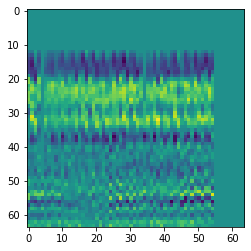

(41, 64, 64, 1)


NameError: name 'rbf_vae' is not defined

In [30]:
img_samples = X_train[235:276]
print(img_samples.shape)
plt.imshow(img_samples[19][:,:,0])
plt.show()
print(img_samples.shape)
img_decoded = rbf_vae.predict(img_samples)
print(img_decoded.shape)
plt.imshow(img_decoded[19][:,:,0])


(41, 64, 64, 1)


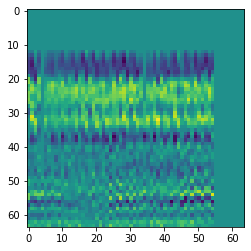

AttributeError: 'list' object has no attribute 'shape'

In [68]:

print(img_samples.shape)
plt.imshow(img_samples[19][:,:,0])
plt.show()
img_encoded = encoder.predict(img_samples)
print("img_encoded", img_encoded.shape)
imd_decoded = rbf_generator.predict(img_encoded)
print(rbf_only_generator.predict(img_encoded).shape, rbf_only_generator.predict(img_encoded), np.count_nonzero(rbf_only_generator.predict(img_encoded)))
print(img_decoded.shape)
plt.imshow(img_decoded[19][:,:,0])

In [38]:
img_rows, img_cols, img_chns = patch_size, patch_size, 1


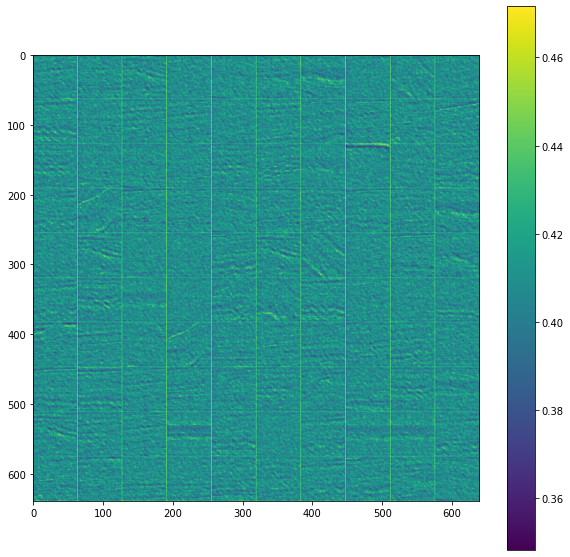

In [79]:
# plot random reconstructions 
n = 10

figure = np.zeros((img_rows * n, img_cols * n))

for i in range(n):
    for j in range(n):
        z_sample = np.random.normal(size=latent_dim).reshape(1, latent_dim)
        #print(z_sample.shape)
        _,x_recon = rbf_decoder.predict(z_sample, batch_size=1)#generator.predict(z_sample, batch_size=1)
        #print(x_recon.shape)
        patch = x_recon.reshape(patch_size, patch_size)
        #print(patch.shape)
        d_x = i * patch_size
        d_y = j * patch_size
        figure[d_x:d_x + patch_size, d_y:d_y + patch_size] = patch

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.colorbar()
plt.show()

In [80]:
from matplotlib import offsetbox

def plot_components(proj, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(proj.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i].T, cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)
    return ax
            
            


(1000, 64, 64, 1)
found data. loading it to memory
Done trainig pca 
num_labelsss 999 999.0
Plottting:  tline


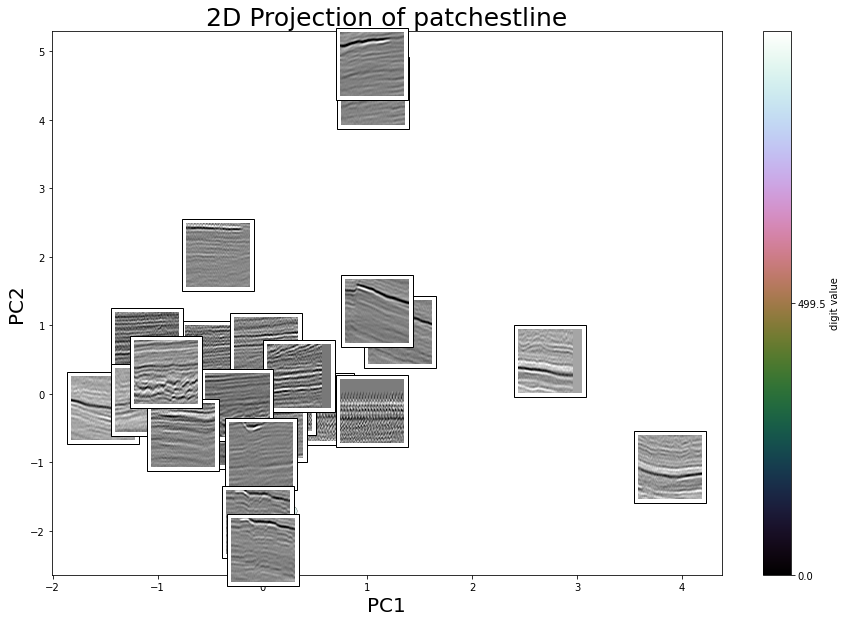

In [81]:
### PLOT ORG IMAHES
from sklearn.decomposition import PCA
print(X_train.shape)
shape = X_train.shape
filename = output_folder + "/pca_embedded_org.npy"
if not os.path.exists(filename):
    print("did not find data.. creating new...")
   
    X_reshape = X_train.reshape((shape[0], -1))
    print(X_reshape.shape)
    n_components = 2
    pca_digits=PCA(n_components)
    pca = pca_digits.fit_transform(X_reshape) 
    print(np.sum(pca_digits.explained_variance_ratio_))
    # store the data 
    np.save(filename, pca)
else:
    print("found data. loading it to memory")
    pca = np.load(filename)
    
print("Done trainig pca ")

# Perform pca  and plot scatterplot of it 
labelss = patched_labels[direction][:shape[0]]
num_labelss = int(np.max(labelss))
print("num_labelsss", num_labelss, labelss[-1])
filename = output_folder + "/pca_" + dir + ".png"
scatter(pca, labelss, num_labelss, dir, show_labels=False, output=filename) 


# Plot acutal images on scatterplot
print("Plottting: ", dir)
images = X_train
plot_components(proj=pca,images=[np.reshape(i, (patch_size, patch_size)).T for i in images])

X_train shape:  (1000, 64, 64, 1)
X_recon shape:  (1000, 2)
Done trainig pca 
num_labelsss 999 999.0
Plottting:  tline
z_sample (1, 2)
z_sample_decoded (1, 64, 64, 1)
z_sample (1, 2)
z_sample_decoded (1, 64, 64, 1)
z_sample (1, 2)
z_sample_decoded (1, 64, 64, 1)
z_sample (1, 2)
z_sample_decoded (1, 64, 64, 1)
z_sample (1, 2)
z_sample_decoded (1, 64, 64, 1)
z_sample (1, 2)
z_sample_decoded (1, 64, 64, 1)
z_sample (1, 2)
z_sample_decoded (1, 64, 64, 1)
z_sample (1, 2)
z_sample_decoded (1, 64, 64, 1)


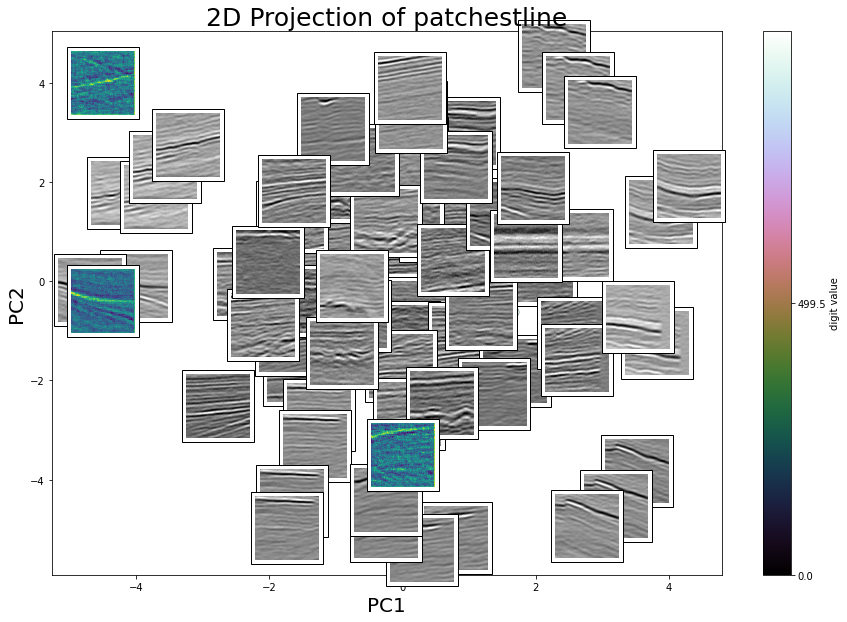

In [94]:
### PLOT ENCODING OF ORGINAL IMAGES ALONG WITH RECONSTRUCTION 
# Here we hope for more meaningful variance 
from sklearn.decomposition import PCA
shape = X_train.shape
print( "X_train shape: ", shape)

X_recon,_,_ =encoder.predict(X_train)
print( "X_recon shape: ",X_recon.shape)

if use_pca:
    filename = output_folder + "/pca_embedded.npy"
    pca_model_filename = output_folder + "/pca_model.npy"

    if not os.path.exists(filename):
        print("did not find data.. creating new...")

        X_reshape = X_recon.reshape((shape[0], -1))
        print(X_reshape.shape)
        n_components = 2
        pca_model=PCA(n_components)
        pca = pca_model.fit_transform(X_reshape) 
        print(np.sum(pca_model.explained_variance_ratio_))
        # store the data 
        #np.save(filename, pca)
        #print('Dumping pca model to: %s' % (pca_model_filename)) 
        #joblib.dump(pca_model, pca_model_filename)
    else:
        print("found data. loading it to memory")
        pca = np.load(filename)
        pca_model = joblib.load(pca_model_filename)
else:
    pca=X_recon
    
print("Done trainig pca ")

# Perform pca  and plot scatterplot of it 
labelss = patched_labels[direction][:shape[0]]
num_labelss = int(np.max(labelss))
print("num_labelsss", num_labelss, labelss[-1])
filename = output_folder + "/pca.png"
scatter(pca, labelss, num_labelss, dir, show_labels=False, output=filename) 


# Plot acutal images on scatterplot
print("Plottting: ", dir)
#random_indexes = np.random.choice(shape[0], 100)
#print("random_indexes", random_indexes)
images,_ = rbf_decoder.predict(X_recon)
ax = plot_components(proj=pca,images=[np.reshape(i, (patch_size, patch_size)).T for i in images])
# now i can chooose a point in the 2d space, inverse pca transform it and decode it to se how it looks betweeen training data

# show a random generated image
def add_image(coord):
    z_sample = coord.reshape(1, -1)#pca_model.inverse_transform(coord).reshape(1, -1)
    print("z_sample", z_sample.shape)
    _,z_sample_decoded = rbf_decoder.predict(z_sample)
    print("z_sample_decoded", z_sample_decoded.shape)
    img_decoded = z_sample_decoded.reshape(patch_size, patch_size)
    #plt.imshow(img_decoded)
    #plt.show()
    imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(img_decoded), coord)
    ax.add_artist(imagebox)


coord = np.asarray([-4.5,-.4])
add_image(coord)

coord = np.asarray([-4.5,-6.0])
add_image(coord)


coord = np.asarray([-4.5,4])
add_image(coord)


coord = np.asarray([7,-2.5])
add_image(coord)

coord = np.asarray([5.5,1])
add_image(coord)

coord = np.asarray([5.5,5])
add_image(coord)

coord = np.asarray([0,6])
add_image(coord)

coord = np.asarray([0, -3.5])
add_image(coord)





In [85]:
# Now we have a vae, we can calculate the latent space riemann 

from scripts.riemannian.riemannian_latent_space import RiemannianMetric, RiemannianTree
from scripts.rbf.rbf import InitCentersKMeans, InitCentersRandom, RBFLayer

import tensorflow as tf
import keras 
from scipy.stats import norm


#generator_path = output_folder+"/decoder_64_64_8x8_1_000_tanh_variance_500epochs.h5"
#decoder = keras.models.load_model(generator_path)

filename = output_folder + "/pca_embedded.npy"
pca_model_filename = output_folder + "/pca_model.npy"

if not os.path.exists(filename):
    print("did not find data.. creating new...")
   
    X_reshape = X_recon.reshape((shape[0], -1))
    print(X_reshape.shape)
    n_components = 2
    pca_model=PCA(n_components)
    pca = pca_model.fit_transform(X_reshape) 
    print(np.sum(pca_model.explained_variance_ratio_))
    # store the data 
    np.save(filename, pca)
    print('Dumping pca model to: %s' % (pca_model_filename)) 
    joblib.dump(pca_model, pca_model_filename)
else:
    print("found data. loading it to memory")
    pca = np.load(filename)
    pca_model = joblib.load(pca_model_filename)
    
#latent_dim = 512
batch_size = 16

found data. loading it to memory


z_sampel (1, 2)
x_decoded.shape (1, 64, 64, 1)
Tensor("input_8:0", shape=(?, 2), dtype=float32) Tensor("var_2/Softplus:0", shape=(?, ?, ?, 1), dtype=float32)
Tensor("strided_slice_205:0", shape=(?,), dtype=float32) Tensor("var_2/Softplus:0", shape=(?, ?, ?, 1), dtype=float32)
num_layer (?, 2) (?, ?, 1)

Done

nklnlnnkl Tensor("var_2/Softplus:0", shape=(?, ?, ?, 1), dtype=float32) Tensor("input_8:0", shape=(?, 2), dtype=float32)
dsfsdsdfds Tensor("strided_slice_208:0", shape=(?, ?, 1), dtype=float32) Tensor("input_8:0", shape=(?, 2), dtype=float32)
doneee


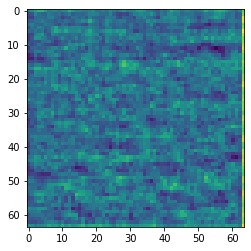

In [95]:
# before dooing this we need to change the riemann.py in the scrips tag.
# there we have hardcoded 28 when it is rally 64

z_sample = np.random.normal(size=latent_dim).reshape(1, latent_dim)
print("z_sampel", z_sample.shape)
_,x_decoded= rbf_decoder.predict(z_sample, batch_size=batch_size)
print("x_decoded.shape", x_decoded.shape)
plt.imshow(np.squeeze(x_decoded))
#decoder.summary()
model_input = rbf_decoder.inputs[0]
model_output = rbf_decoder.outputs[1]
print(model_input, model_output)
print(model_input[:,0], model_output)
print("num_layer",model_input[:,:].shape, model_output[:,0].shape )
#output_dim = model_output.shape[1]
#print("output_dim", model_output.shape[1])
#J=[tf.gradients(model_output[:, _], model_input)[0] for _ in range(64)]
#print(J)
#J = tf.stack(J, axis=1)  # batch x output x latent
print("")
print("Done")
print("")
session = tf.Session()
session.run(tf.global_variables_initializer())
rmetric = RiemannianMetric(x=model_output, z=model_input, session=session)
rmetric.create_tf_graph(output_dim=64)
print("doneee") 




(1000, 64, 64, 1) (1000, 2) (1000, 2)
donecalc magnitude  100 [0.02700827 0.02651497 0.02632788 0.02660388 0.02642563 0.02650992
 0.0265175  0.02659417 0.02670232 0.0257667  0.02709101 0.02693127
 0.02695839 0.02703284 0.02735412 0.02736734 0.02744226 0.02738876
 0.02701695 0.02702008 0.02715474 0.02728757 0.02721102 0.02717298
 0.02490382 0.02690976 0.02717167 0.02722461 0.02745836 0.02745529
 0.02741474 0.02719636 0.02636855 0.02700779 0.02679688 0.02675984
 0.02227848 0.02561685 0.0253577  0.02731118 0.024868   0.02558158
 0.02394994 0.02730031 0.02739745 0.02655781 0.02554727 0.02738789
 0.02735891 0.02737509 0.02742311 0.02739301 0.02733934 0.02745143
 0.02729811 0.02728914 0.02730046 0.02739058 0.0261535  0.02544218
 0.02635179 0.0269405  0.0247284  0.02604428 0.02496005 0.02701124
 0.02499788 0.02694204 0.02703059 0.02663209 0.02688861 0.02668057
 0.02673118 0.02595791 0.0259637  0.02740764 0.02727703 0.0271411
 0.02731446 0.02740095 0.02739649 0.02740461 0.02741851 0.02741044
 

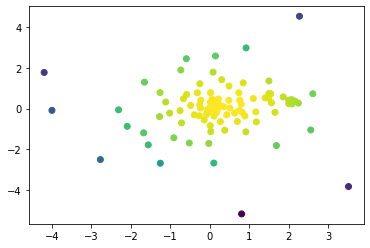

In [96]:
# claculate the magnitude for each point
print(X_train.shape, X_recon.shape, pca.shape)

num = 100
mf = session.run(rmetric.MF, {rmetric.z: X_recon[:num]})
print("donecalc magnitude ", np.count_nonzero(mf), mf)
plt.figure()
print(pca[:num,0])
plt.scatter(pca[:num,0], pca[:num,1], c=mf)
plt.show()


input shape (1000, 2)

grid_inp [[-1.64485363  1.64485363]
 [-1.03643339  1.64485363]
 [-0.67448975  1.64485363]
 [-0.38532047  1.64485363]
 [-0.12566135  1.64485363]
 [ 0.12566135  1.64485363]
 [ 0.38532047  1.64485363]
 [ 0.67448975  1.64485363]
 [ 1.03643339  1.64485363]
 [ 1.64485363  1.64485363]] [[-1.64485363 -1.64485363]
 [-1.03643339 -1.64485363]
 [-0.67448975 -1.64485363]
 [-0.38532047 -1.64485363]
 [-0.12566135 -1.64485363]
 [ 0.12566135 -1.64485363]
 [ 0.38532047 -1.64485363]
 [ 0.67448975 -1.64485363]
 [ 1.03643339 -1.64485363]
 [ 1.64485363 -1.64485363]]
(100, 2)
(100, 64, 64, 1)


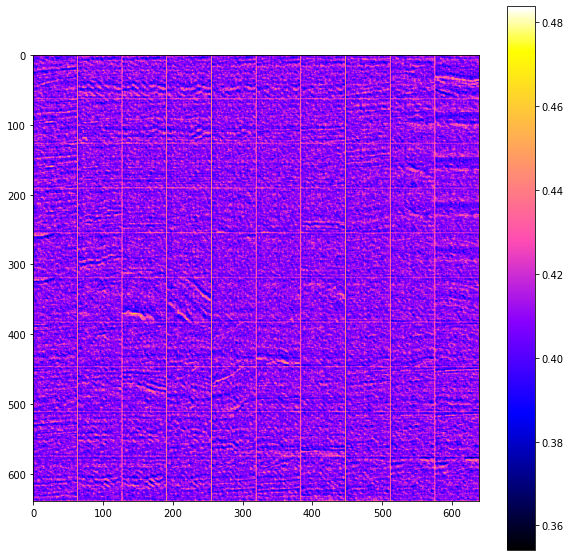

In [99]:
# Display a 2D manifold of the digits
n = 10  # figure with 20x20 digits
figure = np.zeros((patch_size * n, patch_size * n))

# 1. create grid form training pca space 
print("input shape", pca.shape)
#x_min, x_max = pca[:, 0].min() - 1, pca[:, 0].max() + 1
#y_min, y_max = pca[:, 1].min() - 1,pca[:, 1].max() + 1
#xx, yy = np.meshgrid(np.linspace(x_min, x_max, n),
#                    np.linspace(y_min, y_max, n))
xxx = np.flip(norm.ppf(np.linspace(0.05, 0.95, n)))
yyy = norm.ppf(np.linspace(0.05, 0.95, n))
#print(xxx[:5], yyy[:5])
grid_inp = np.empty([n*n, 2])
ii=0
for i, yi in enumerate(xxx):
    for j, xi in enumerate(yyy):
        grid_inp[ii] = np.asarray([xi, yi])
        ii+=1
print()
print("grid_inp", grid_inp[:10], grid_inp[-10:])

#print(x_min, y_max, y_min, y_max, xx.shape, yy.shape)
# convert to actual coordinate format 
#grid_inp = np.c_[xx.ravel(), yy.ravel()]   
#print(grid_inp.shape, grid_inp[0:10])

# 2. inverce pca it to get correct latent dims
if use_pca:
    latent_grid_inp = pca_model.inverse_transform(grid_inp)
else: latent_grid_inp = grid_inp
print(latent_grid_inp.shape)

# 3. decode each latent vector
_,latent_grid_out = rbf_decoder.predict(latent_grid_inp)
print(latent_grid_out.shape)
# 4. plot it in grid
indx = 0
for i, yi in enumerate(xxx):
    for j, xi in enumerate(yyy):
        z_sample = np.squeeze(latent_grid_out[indx])
        figure[i * patch_size: (i + 1) * patch_size,
               j * patch_size: (j + 1) * patch_size] = z_sample
        indx+=1

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='gnuplot2')
plt.colorbar()
plt.show()  

-5.808657646179199 5.540581703186035 -6.422091960906982 5.540581703186035 (12, 12) (12, 12)
(144, 2)
grid_inp [[-5.80865765 -6.42209196]
 [-4.80865765 -6.42209196]
 [-3.80865765 -6.42209196]
 [-2.80865765 -6.42209196]
 [-1.80865765 -6.42209196]
 [-0.80865765 -6.42209196]
 [ 0.19134235 -6.42209196]
 [ 1.19134235 -6.42209196]
 [ 2.19134235 -6.42209196]
 [ 3.19134235 -6.42209196]] [[-3.80865765  4.57790804]
 [-2.80865765  4.57790804]
 [-1.80865765  4.57790804]
 [-0.80865765  4.57790804]
 [ 0.19134235  4.57790804]
 [ 1.19134235  4.57790804]
 [ 2.19134235  4.57790804]
 [ 3.19134235  4.57790804]
 [ 4.19134235  4.57790804]
 [ 5.19134235  4.57790804]]
(144, 2)
mf grid (144,) 144
mf grid (144,) 144
0.0126571 0.027393779


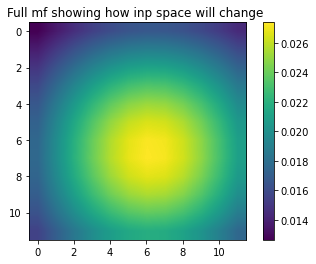

In [98]:
# Now we want to plot the riemann metric to display the distorion when goin from Z --> X
# This is more complicated as the datapoints are not in 2d when we encode. 
# The goal is to look how much the datapoint in z actually diverge by looking at how much they change from Z --> X
# We can rom this assume that high divergence in this process contribute to more sditance among the points. 
# By plotting it we can infer geometry to the latent space. 

# If this was 2d we could easily calc the metric for each gridpoint in the 2d plane. 
# But when our latet space is in more (e.g 16) dimentions we cannot pick such a grid
# But, we can project the 16 dimensjons on to the 2d GRID BY EITHER pca, T_SNE(not good for distances) or UMAP. 
# Here, seeing these are symetrical (meaning map from x->z and z-> x will give same x ) we assume that 
# we can 
    # 1. choose a. grid from the training pca (where the datapoints so far have landed and most new will), 
    # 2. Calc the inverse PCA for all these, therby finding the 16 dim vector corresponding to this "cell"
    # 3. calc riemann magnitude over this, and seeing we know the posision in 2d for the 16d vecotr, we can plot it in the 2d PCA space. 
    # 4. plot it in a 2d map with the scatterplots 

# 1. create grid form training pca space 
# here we use the same grid as the labove cell 

#print("input shape", pca.shape)
############# #commment out for exaclyt same ploat as above
h = 1  # step size in the mesh
x_min, x_max = pca[:, 0].min() - 1, pca[:, 0].max() + 1
y_min, y_max = pca[:, 1].min() - 1,pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                   np.arange(y_min, y_max, h))
print(x_min, y_max, y_min, y_max, xx.shape, yy.shape)
# convert to actual coordinate format 
grid_inp = np.c_[xx.ravel(), yy.ravel()]   
##########
print(grid_inp.shape)
print("grid_inp", grid_inp[:10], grid_inp[-10:])




# 2. inverce pca it to get correct latent dims 
# here we use the same pca gird as the above cell 
#######commment out for exaclyt same ploat as above
if use_pca:
    latent_grid_inp = pca_model.inverse_transform(grid_inp)
else: latent_grid_inp = grid_inp
############
print(latent_grid_inp.shape)

# 3. calc riemann magnitude for each latend vector 
mf = session.run(rmetric.MF, {rmetric.z: latent_grid_inp})
print("mf grid", mf.shape,  np.count_nonzero(mf))
mf = np.nan_to_num(mf)
print("mf grid", mf.shape,  np.count_nonzero(mf))


# 4. plot it in a scatterplot 
# Put the result into a color plot
########commment out for exaclyt same ploat as above
Z = mf.reshape(xx.shape)
#Z = mf.reshape(n, n)
#######

print(Z.min(), Z.max())
def normalizeData(data):
      return (data - np.min(data)) / (np.max(data) - np.min(data))
#Z = normalizeData(Z)
#print(Z.min(), Z.max())

plt.figure()
plt.imshow(Z, interpolation="bilinear")
#plt.pcolormesh(xx, yy, Z, cmap="brg")

#plot actuals
plt.title("Full mf showing how inp space will change ")
plt.colorbar()
plt.show()




(1000, 512)
(1000, 512)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rbf_layer_28 (RBFLayer)      (None, 64)                32832     
_________________________________________________________________
foo (Dense)                  (None, 1)                 65        
Total params: 32,897
Trainable params: 32,897
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1000/1000 [==============================] - 1s - loss: 0.2461      
Epoch 2/100
1000/1000 [==============================] - 0s - loss: 0.2405     
Epoch 3/100
1000/1000 [==============================] - 0s - loss: 0.2356     
Epoch 4/100
1000/1000 [==============================] - 0s - loss: 0.2308     
Epoch 5/100
1000/1000 [==============================] - 0s - loss: 0.2261     
Epoch 6/100
1000/1000 [==============================] - 0s - loss: 0.2214     
Epoch 7/100
1000/1000 [======

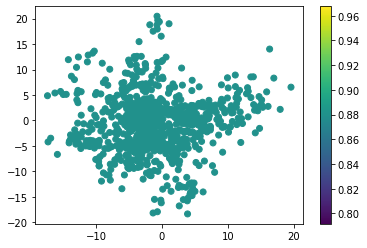

(40, 40) (40, 40)
(40, 40)
MAXMIN 0.8795988 0.8795988


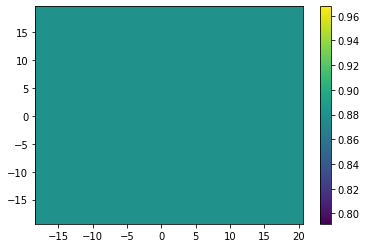

In [110]:
### RBF 
from keras.models import Sequential
from keras.layers.core import Dense
from keras.engine.topology import Layer
from keras.initializers import RandomUniform, Initializer, Constant
from keras.losses import binary_crossentropy
from keras.optimizers import RMSprop

print(X_recon.shape)

#encoded = pca_model.transform(X_recon)
#plt.scatter(encoded[:,0], encoded[:,1])
#plt.show();
X =X_recon # pca_model.transform(X_recon)
print(X.shape)

model = Sequential()

rbflayer = RBFLayer(64,
                    initializer=InitCentersKMeans(X),#InitCentersRandom(X),
                    betas=2.0, # determine the sharpness of the gausian https://towardsdatascience.com/most-effective-way-to-implement-radial-basis-function-neural-network-for-classification-problem-33c467803319
                    input_shape=(latent_dim,))
model.add(rbflayer)
model.add(Dense(1, activation='sigmoid', name='foo'))
#model.add(Dense(1, activation='sigmoid', ))

#model.add(Dense(64, name='foo'))

#model.add(layers.Reshape((8,8,1))) # subsampled image of 64*64  (i guess)
#model.add(layers.Conv2DTranspose(1, 3,
#                           padding='same', #TODO NEED TO CLIP WEIGHT SO IT IS POSITIVE
#                           activation='linear',
#                           strides=(2, 2)))
#model.add(layers.Conv2DTranspose(1, 3,
#                           padding='same', #TODO NEED TO CLIP WEIGHT SO IT IS POSITIVE
#                           activation='linear',
#                           strides=(2, 2)))
#model.add(layers.Conv2DTranspose(1, 3,
#                           padding='same',  #TODO NEED TO CLIP WEIGHT SO IT IS POSITIVE
#                           activation='linear',
#                           strides=(2, 2)))
#model.add(layers.Conv2D(1, 3,
#                  padding='same', 
#                  activation='relu', strides=(1, 1)))


model.compile(loss="mean_squared_error",
              optimizer=RMSprop()) #'mean_squared_error',

model.summary()
#print(np.unique(y))# WE ONLY WANT 1 CLASSS SO WE CAN GET PROBABILITY COMPARED TO "BACKGROUNS"!!! SOONLY ADD ONES
model.fit(X, np.ones((X.shape[0])),
          batch_size=50,
          epochs=100,
          verbose=1)

# predict input sampes 
#y_pred = model.predict(X)
#print(X.shape, y_pred.shape)
#x_pca = pca_model.transform(X)
#plt.scatter(x_pca[:,0], x_pca[:,1], c=y_pred)
#plt.colorbar()
#plt.show()

#h = 1
#x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
#y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
#end = max(x_max, y_max)
#xx, yy = np.meshgrid(np.arange(x_min, end, h),
#                    np.arange(y_min, x_max, h))

#print(xx.shape, yy.shape)
#grid_inp = np.c_[xx.ravel(), yy.ravel()]

#grid_latent = pca_model.inverse_transform(grid_inp)
#grid_latent_pred = model.predict(grid_latent)
#grid_latent_pred = grid_latent_pred.reshape(xx.shape)
#print(grid_latent_pred.shape)
#print("MAXMIN", grid_latent_pred.min(), grid_latent_pred.max())
#plt.figure()
#plt.pcolormesh(xx, yy, grid_latent_pred)# norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),)
#plt.colorbar()
#plt.show()

# predict grid around smaples 
#grid_pred = model.predict(grid_inp)
#print(X.shape, grid_pred.shape)

#Z = grid_pred.reshape(n, n)
#plt.imshow(Z, interpolation="bilinear")
#plt.show()
#plt.scatter(X[:,0], X[:,1], c=y_pred)
#plt.colorbar()
#plt.show()


In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.show();

(545, 571) (545, 571)
(311195, 1)
MAXMIN 0.8761763 0.99978596
MAXMIN 0.8761763 0.99978596
(545, 571)
MAXMIN 0.8761763 0.99978596


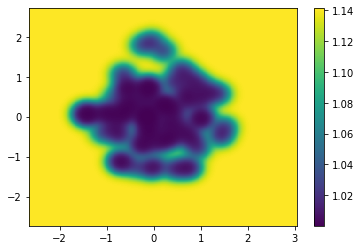

In [46]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
end = max(x_max, y_max)
xx, yy = np.meshgrid(np.arange(x_min, end, h),
                    np.arange(y_min, x_max, h))

print(xx.shape, yy.shape)
grid_inp = np.c_[xx.ravel(), yy.ravel()]

Z_rbf = np.absolute(model.predict(grid_inp))
print(Z_rbf.shape)
print("MAXMIN", Z_rbf.min(), Z_rbf.max())

def normalizeData(data):
  return (data - np.min(data)) / (np.max(data) - np.min(data))
#Z = normalizeData(Z) + 0.001
#print("MAXMIN", Z.min(), Z.max())
# Put the result into a color plot
Z_rbf =Z_rbf.reshape(xx.shape)
print("MAXMIN", Z_rbf.min(), Z_rbf.max())
print(Z_rbf.shape)
print("MAXMIN", Z_rbf.min(), Z_rbf.max())

Z_rbf = 1/Z_rbf
plt.figure()
plt.pcolormesh(xx, yy, Z_rbf)# norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),)
# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")

plt.colorbar()
plt.show()

(15, 15)
MAXMIN 0.8761763 0.9997688
MAXMIN 0.8761763 0.9997688
(15, 15)
MAXMIN 0.8761763 0.9997688
(15, 15)


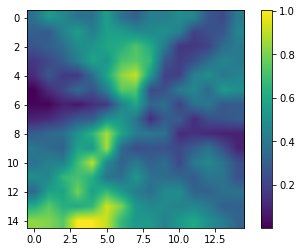

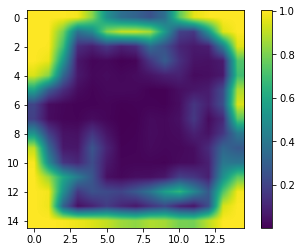

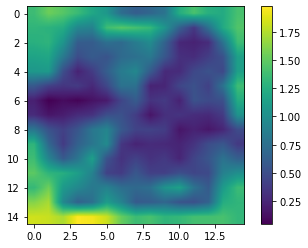

In [78]:
Z_rbf = model.predict(grid_inp)
Z_rbf = Z_rbf.reshape(n,n)
print(Z_rbf.shape)
print("MAXMIN", Z_rbf.min(), Z_rbf.max())

def normalizeData(data):
  return (data - np.min(data)) / (np.max(data) - np.min(data))
print("MAXMIN", Z_rbf.min(), Z_rbf.max())
print(Z_rbf.shape)
print("MAXMIN", Z_rbf.min(), Z_rbf.max())

Z_rbf = 1/Z_rbf
Z_rbf = normalizeData(Z_rbf) + 0.001

print(Z_rbf.shape)
plt.imshow(Z, interpolation="bilinear")
plt.colorbar()
plt.show()

plt.imshow(Z_rbf, interpolation="bilinear")
plt.colorbar()
plt.show()

z_add = Z_rbf + Z 
plt.imshow( z_add , interpolation="bilinear")
plt.colorbar()
plt.show()



(545, 571) (545, 571)


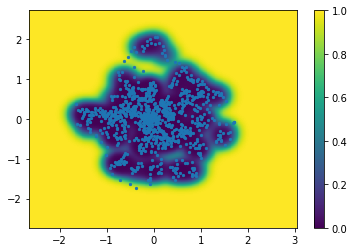

In [123]:
# adding the

print(Z.shape, Z_rbf.shape)

Z_add = Z + Z_rbf


#plt.imshow(Z_add)
plt.pcolormesh(xx, yy, Z_add)
plt.scatter(X[:,0], X[:,1], s=5)

plt.colorbar()
plt.show()

nklnlnnkl Tensor("rbf_layer_44/Exp:0", shape=(?, 64), dtype=float32) Tensor("rbf_layer_44_input:0", shape=(?, 2), dtype=float32)
dsfsdsdfds Tensor("strided_slice_169:0", shape=(?,), dtype=float32) Tensor("rbf_layer_44_input:0", shape=(?, 2), dtype=float32)
MAXMIN 0.0 39.87465
MAXMIN 0.0 39.87465
MAXMIN 1e-04 0.9999
MAXMIN 1.0001 10000.0


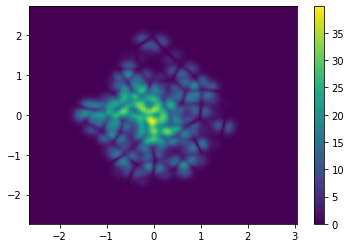

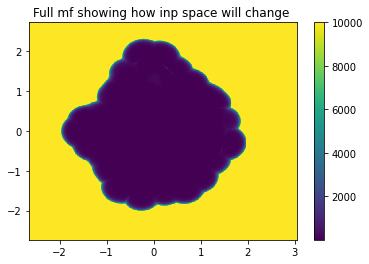

In [125]:
session = tf.Session()
session.run(tf.global_variables_initializer())

rmetric = RiemannianMetric(x=model.get_layer(index = 1).output, z=model.input, session=session)
#rmetric = RiemannianMetric(x=model.output, z=model.input, session=session)
rmetric.create_tf_graph()

mf = session.run(rmetric.MF, {rmetric.z: grid_inp})
mf = np.nan_to_num(mf)
print("MAXMIN", mf.min(), mf.max())

Z = mf.reshape(xx.shape)
print("MAXMIN", Z.min(), Z.max())
#Z = (1/mf).reshape(xx.shape)
#print("MAXMIN", Z.min(), Z.max())
plt.pcolormesh(xx, yy, Z)
plt.colorbar()

plt.show()

#print("MAXMIN", Z.min(), Z.max())
Z = np.clip(normalizeData(Z), 0.0001, 0.9999)
plt.pcolormesh(xx, yy, Z)
plt.show()
print("MAXMIN", Z.min(), Z.max())
Z= 1/Z
print("MAXMIN", Z.min(), Z.max())
#Z=  np.nan_to_num(z_inverse)
#print("MAXMIN", z_inverse.min(), z_inverse.max())




plt.figure()
plt.pcolormesh(xx, yy, Z)#, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))

#plot actuals
#plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Full mf showing how inp space will change ")
plt.colorbar()


plt.show()
